In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


**EDA Portion**

In [7]:
#Verifying number of subjects in study
print('There are ' + str(len(df['Subject ID'].unique())) + ' subjects in this instance of the OASIS study.')

There are 150 subjects in this instance of the OASIS study.


In [8]:
#Verifying scan number
print('There are ' + str(len(df['MRI ID'].unique())) + ' scans in this instance of the OASIS study.')

There are 373 scans in this instance of the OASIS study.


*This scan-subject discrepancy suggests that there is not a consistent number of scans across each patient. We will look deeper into this in our visit variable analysis*

<AxesSubplot: >

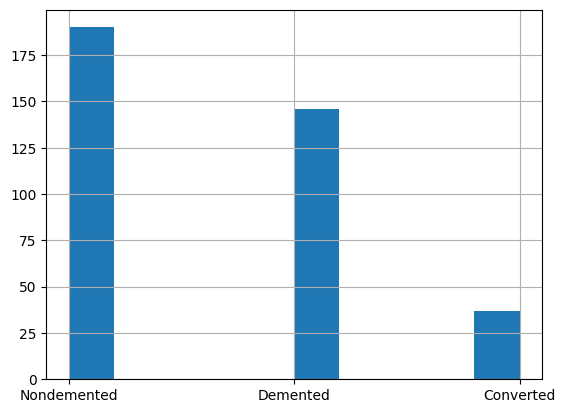

In [9]:
#Group statistics
df['Group'].hist()

*There seems to be a stronger prevalence of demented/non-demented patients. We will consider this class imbalance in our analyses.*

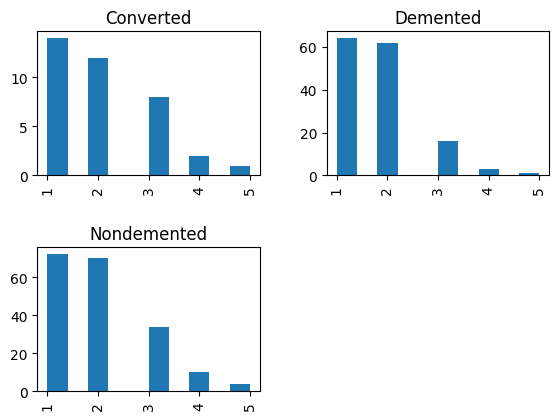

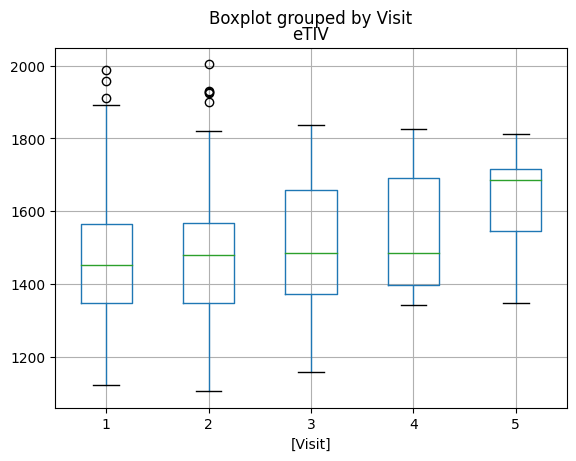

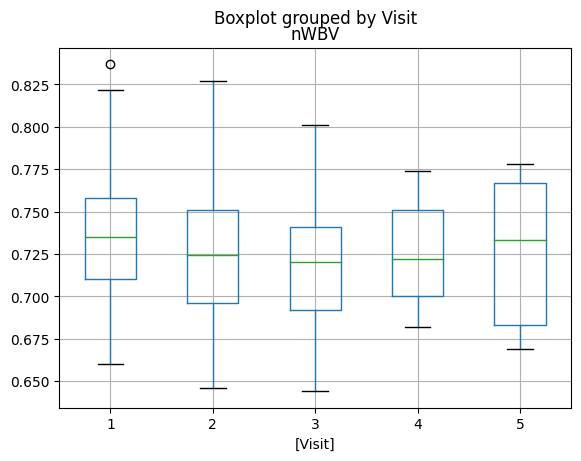

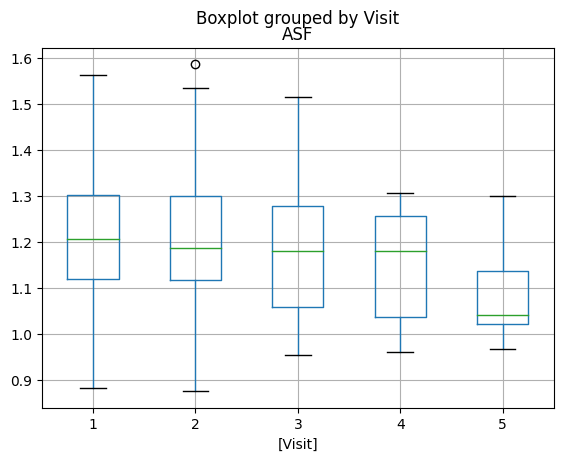

In [10]:
#Visit statistics -- handling this as a categorical variable b/c that's more reflective of what's happening
df[['Group','Visit']].hist(by='Group')
vals = df.groupby(['Visit']).size()
depVars = ['eTIV','nWBV','ASF']
for var in depVars:
    df[[var,'Visit']].boxplot(by='Visit')

*This interesting find demonstrates that both our core values (MMSE,eTIV, etc.) as well as our ratio of converted:demented:Nondemented change considerably as we move across visits. Since all subjects are observed at Visit 1, we consider an ablation removing all other visits in a parallel analysis to the full version*

In [11]:
#MR-Delay statistics
df.groupby(['Visit'])['MR Delay'].mean()

Visit
1       0.000000
2     714.145833
3    1332.637931
4    1886.666667
5    2257.333333
Name: MR Delay, dtype: float64

*It is clear that this MR Delay is closely tied to visit number. We will not consider MR Delay in our analysis.*

M/F
F    213
M    160
Name: M/F, dtype: int64
M/F  Group      
F    Converted       24
     Demented        60
     Nondemented    129
M    Converted       13
     Demented        86
     Nondemented     61
Name: M/F, dtype: int64


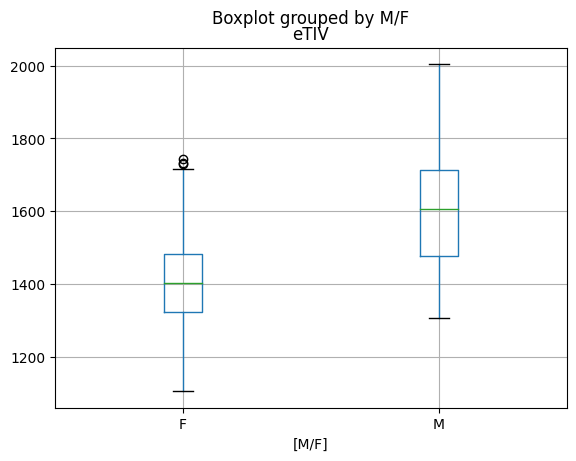

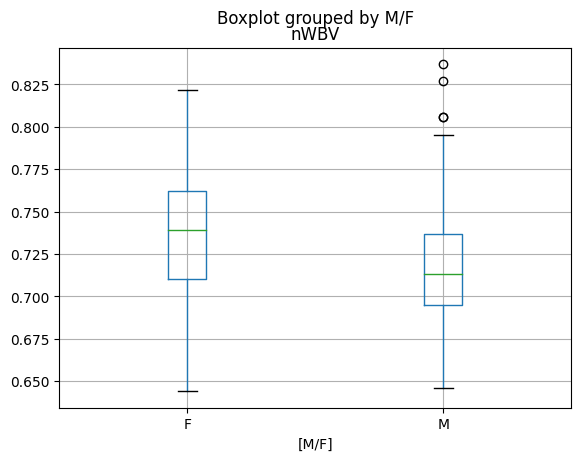

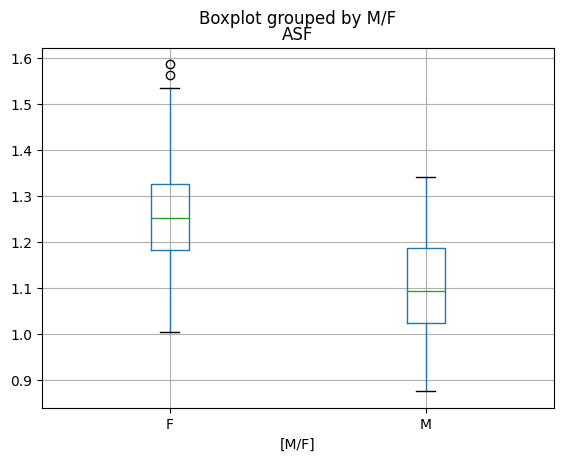

In [12]:
#Gender statistics
print(df.groupby(['M/F'])['M/F'].count())
print(df.groupby(['M/F','Group'])['M/F'].count())
depVars = ['eTIV','nWBV','ASF']
for var in depVars:
    df[[var,'M/F']].boxplot(by='M/F')

*There are some notable gender differences, particularly in the sheer count (213 v. 160) and proprtions of each gender with each affliction category. However, there seems to be a relatively similar distribution of all other relevant variables. Due to this, we will be mindful of the gender disparity but we will not attempt to correct this difference prior to analysis*

In [13]:
#Hand statistics
df['Hand'].unique()

array(['R'], dtype=object)

*All participants are right-handed. This is a requirement for many neuroscience studies due to hemisphere differences in individuals with differing dominant hands.*

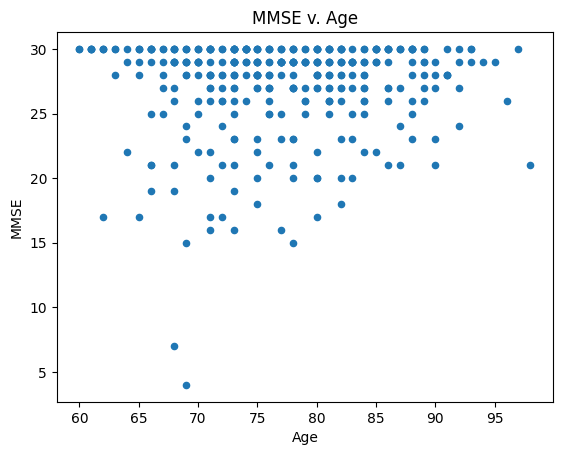

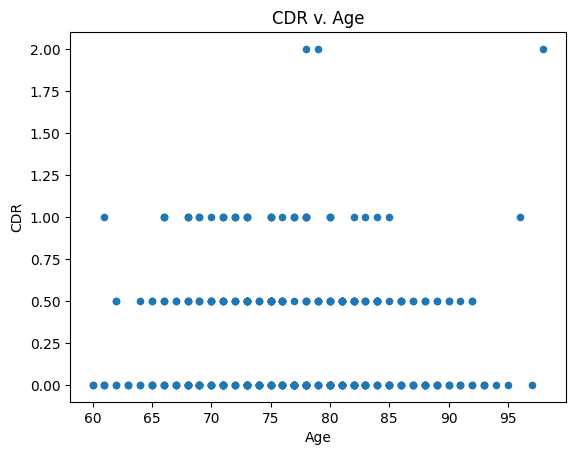

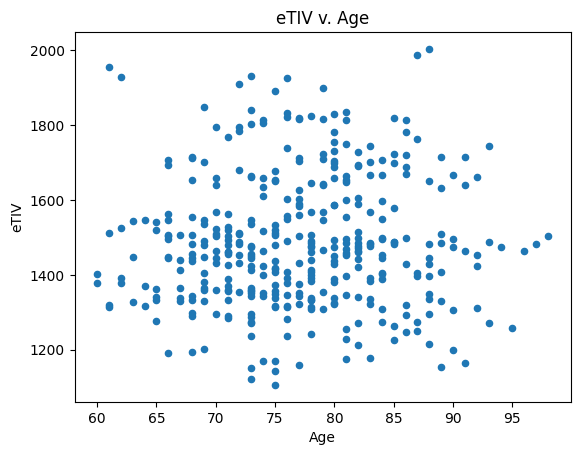

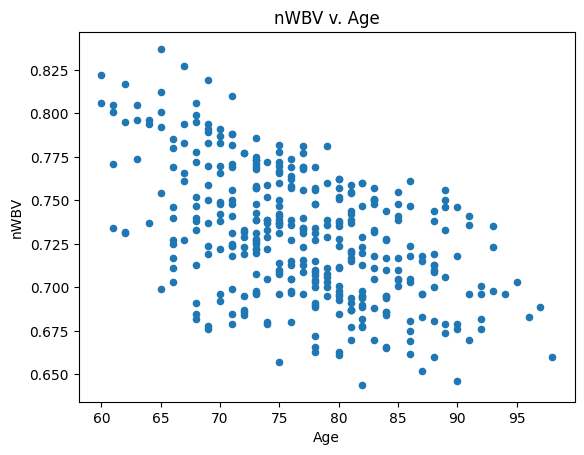

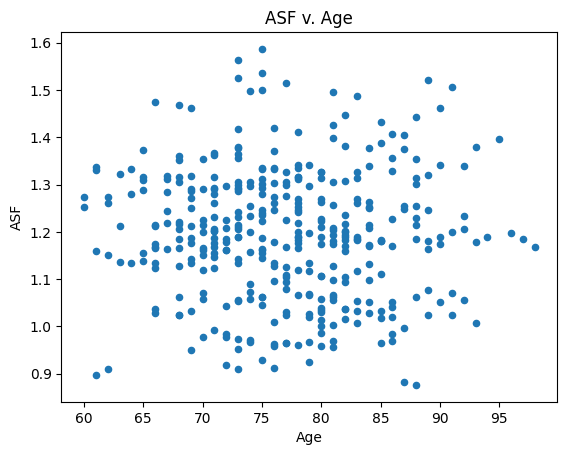

In [14]:
#Age statistics
depVars = ['MMSE','CDR','eTIV','nWBV','ASF']
for var in depVars:
    df.plot.scatter(x = 'Age',y= var,title=var + ' v. Age')

*Relevant variables do not seem strongly correlated with other independents. Age does seem moderately associated to brain measures. We will consider the ablation of age in a separate analysis to eliminate the possibility of age-related dementia masking as disease.*

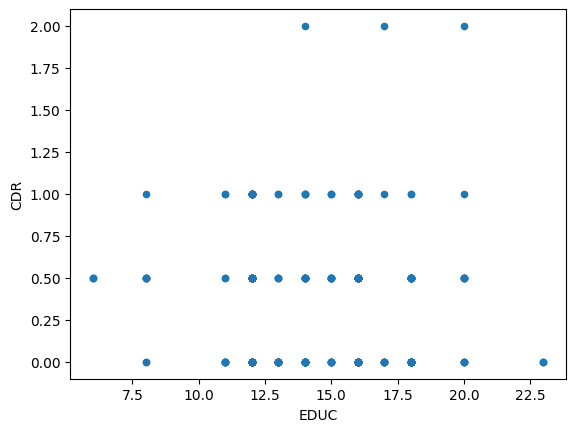

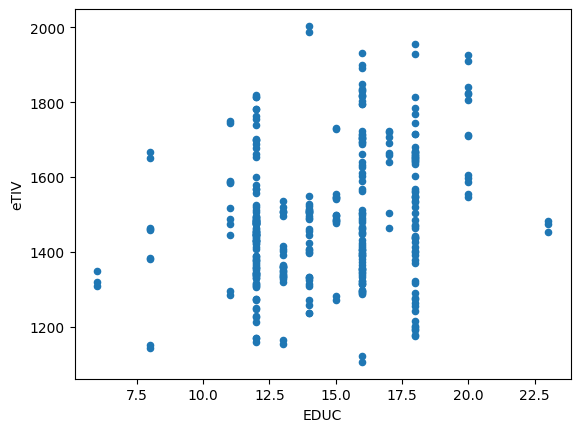

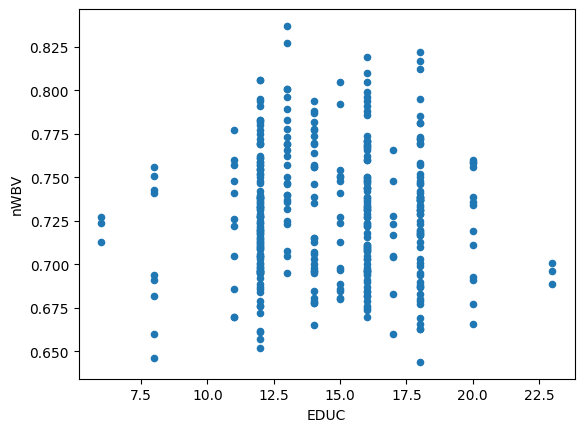

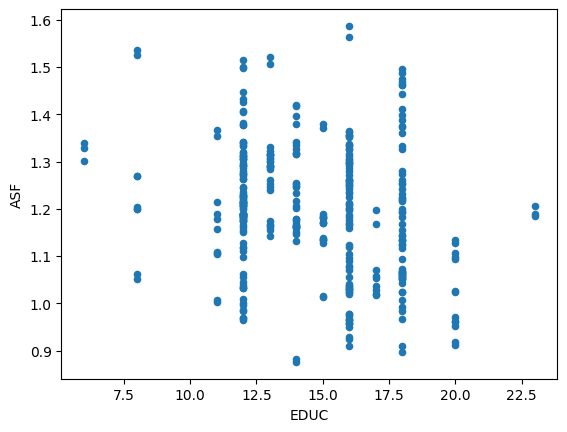

In [15]:
#Educ statistics
depVars = ['CDR','eTIV','nWBV','ASF']
for var in depVars:
    df.plot.scatter(x = 'EDUC',y= var)

*Education does not seem strongly associated with outcome variables. We will include education in our analysis and not take any further precuations.*

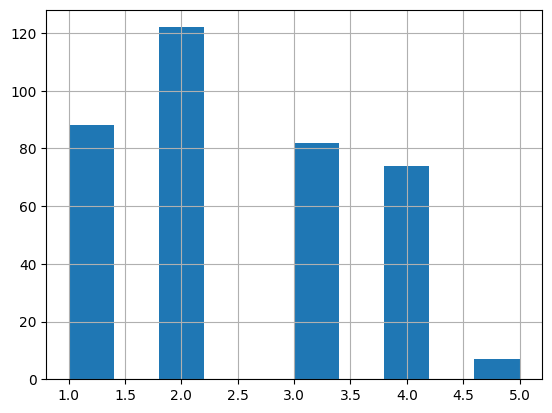

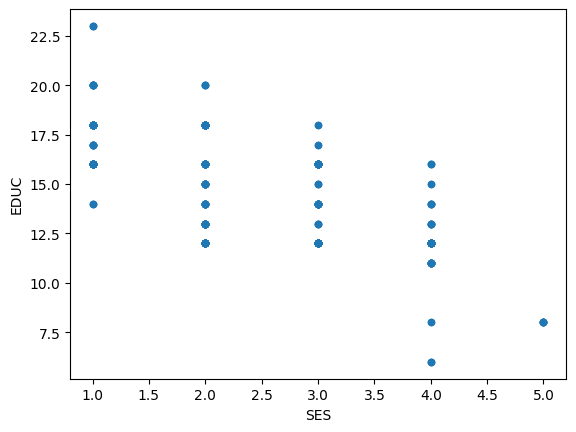

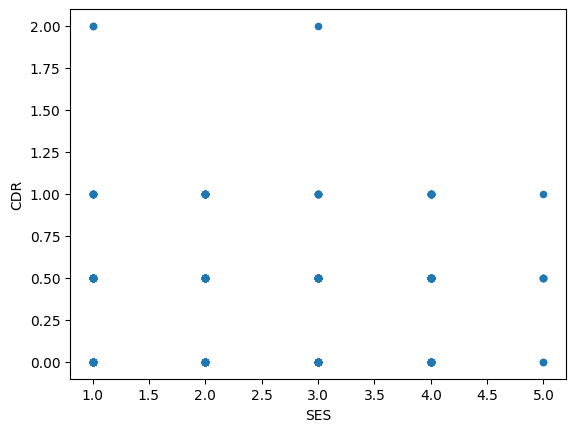

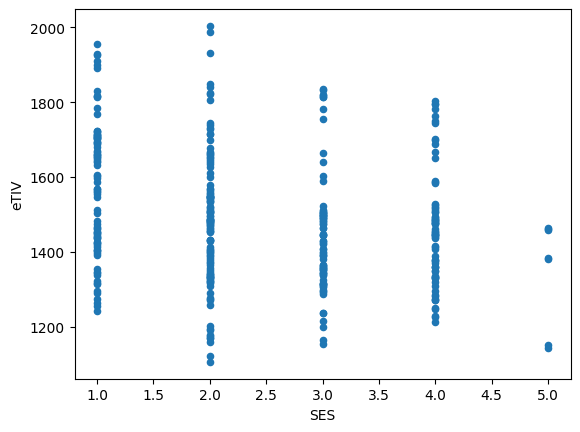

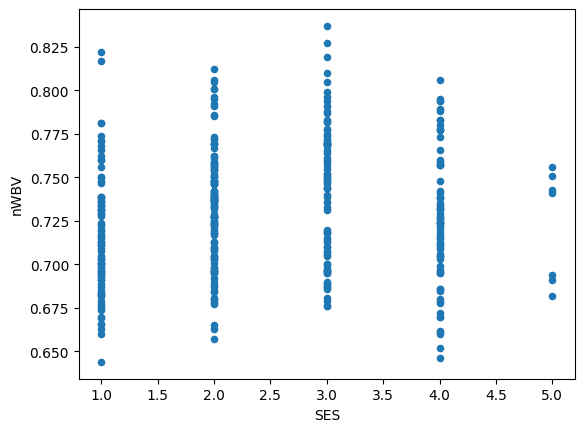

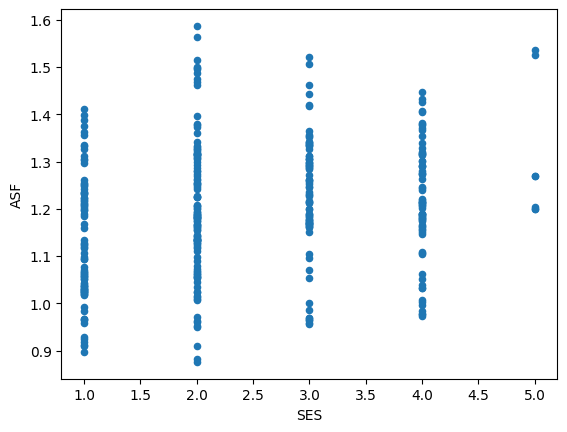

In [16]:
#SES variable
#imputation of NaN with median
df['SES'] = df['SES'].fillna(df['SES'].median())
#visualizing distribution
df['SES'].hist()
#plotting against potential dependents
depVars = ['EDUC','CDR','eTIV','nWBV','ASF']
for var in depVars:
    df.plot.scatter(x = 'SES',y= var)

*SES seems somewhat correlated with Education*

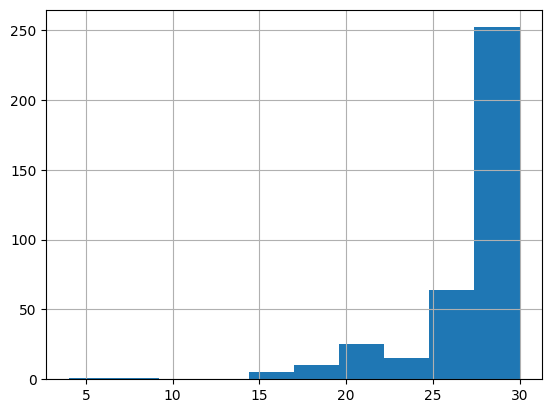

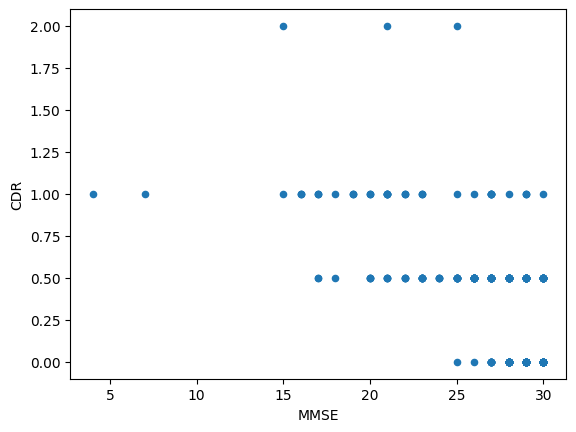

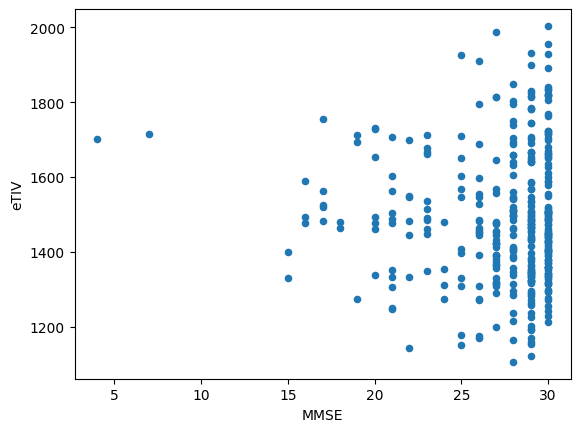

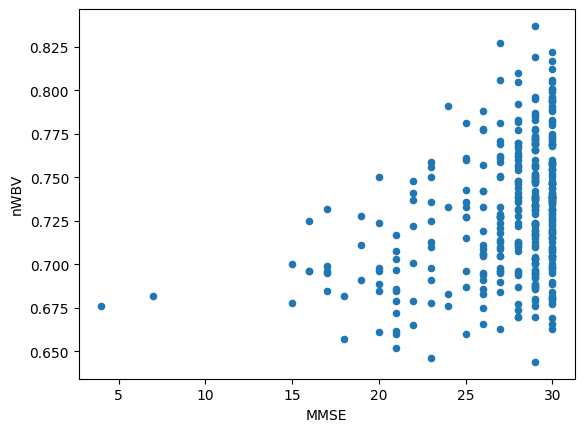

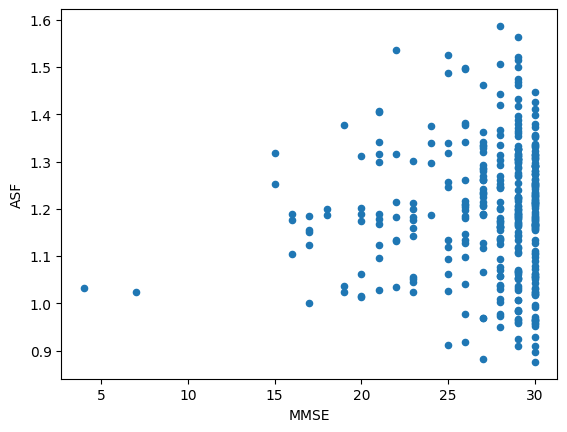

In [17]:
#MMSE
#imputation of NaN with median
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())
#visualizing distribution
df['MMSE'].hist()
#potential dependencies
depVars = ['CDR','eTIV','nWBV','ASF']
for var in depVars:
    df.plot.scatter(x = 'MMSE',y= var)

*MMSE extremely right-skewed, but this makes sense given metric itself.*

<AxesSubplot: title={'center': 'CDR by Group'}, xlabel='CDR', ylabel='Group'>

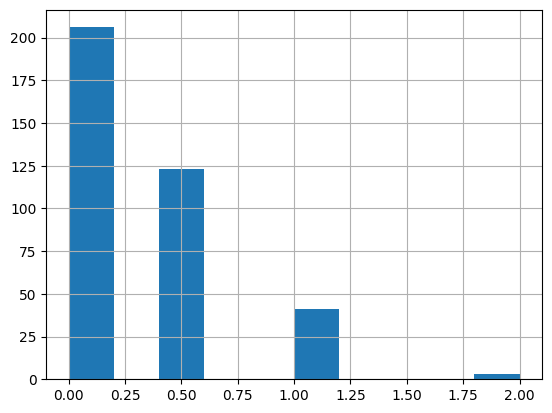

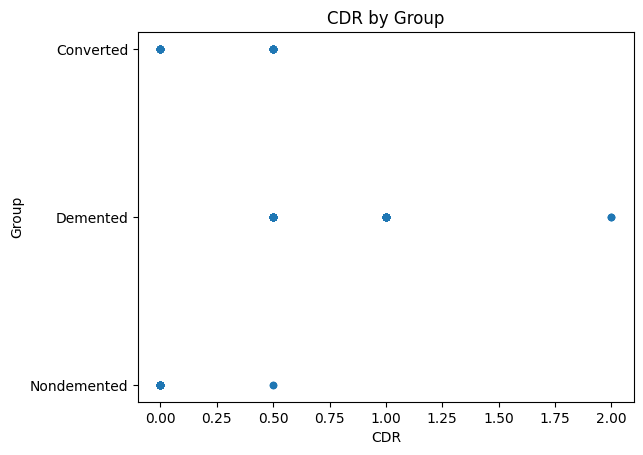

In [18]:
#CDR Variable
#visualizing distribution
df['CDR'].hist()
#dependency
df.plot.scatter(x = 'CDR',y= 'Group',title='CDR by Group')

*CDR is not usable for analyses as it is effectively a flag for dementia*

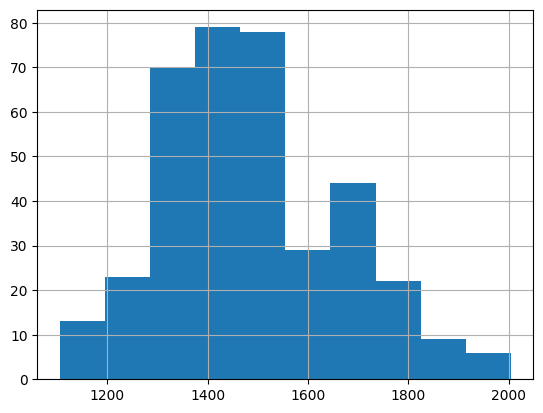

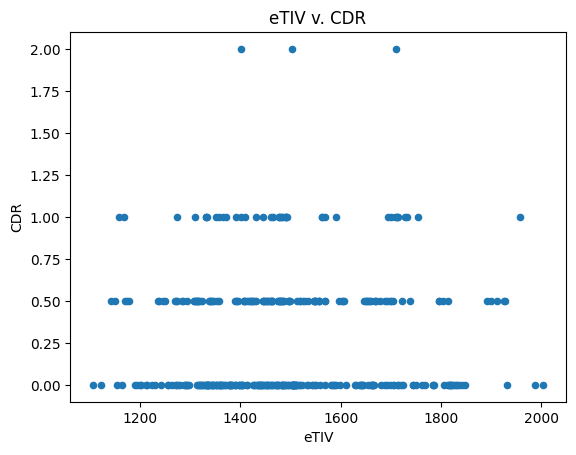

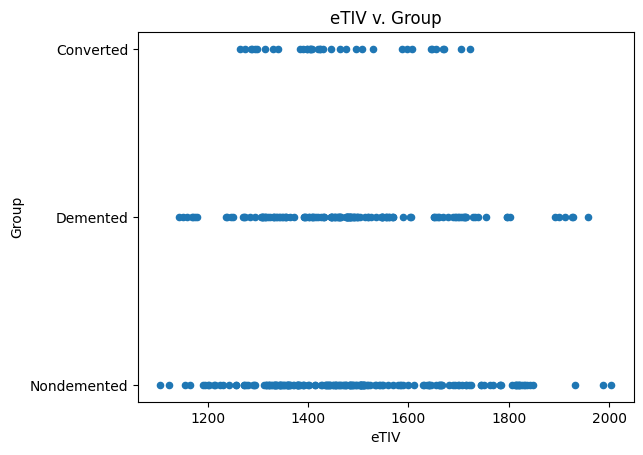

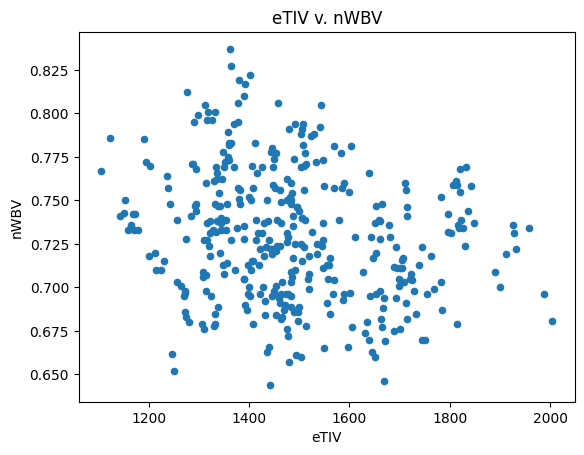

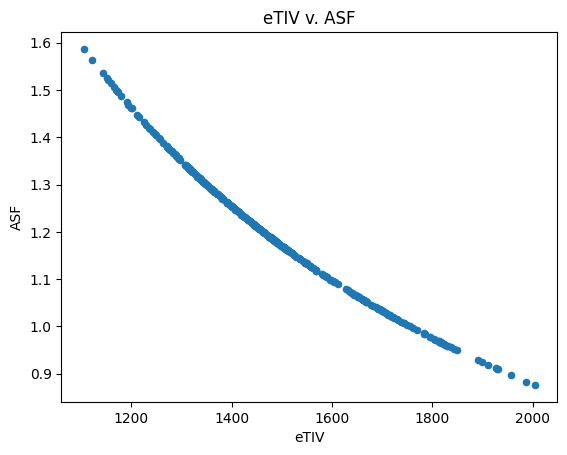

In [19]:
#eTIV Variable
df['eTIV'].hist()
#dependency
#potential dependencies
depVars = ['CDR','Group','nWBV','ASF']
for var in depVars:
    df.plot.scatter(x = 'eTIV',y= var, title= 'eTIV v. ' + var)

*eTIV is very closely associated with ASF, as ASF is dependent on brain/head size, denoted by eTIV. We will keep both in the analysis as this is in line with mirrored studies.*

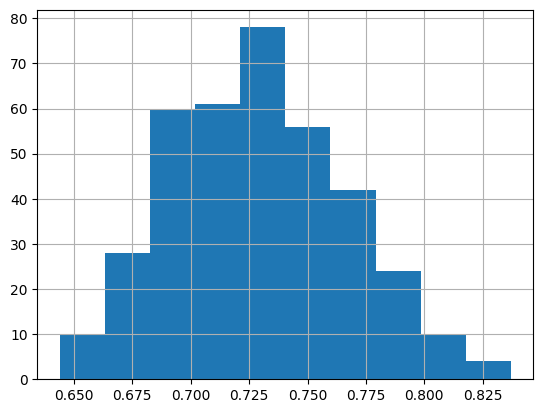

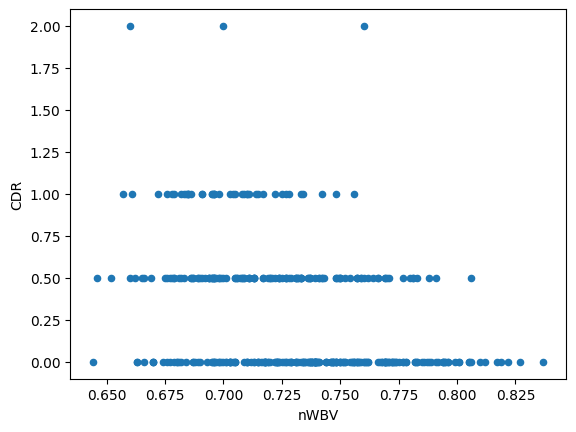

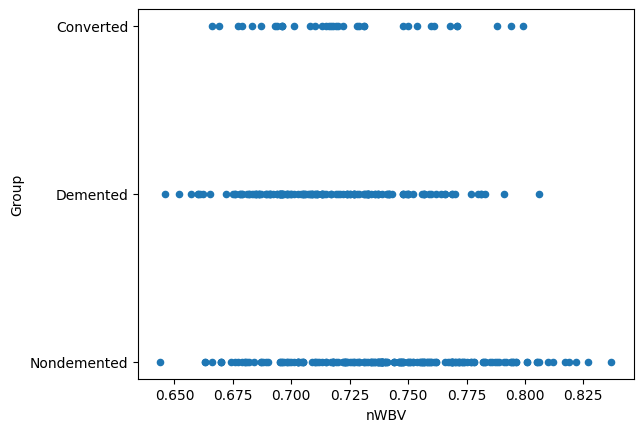

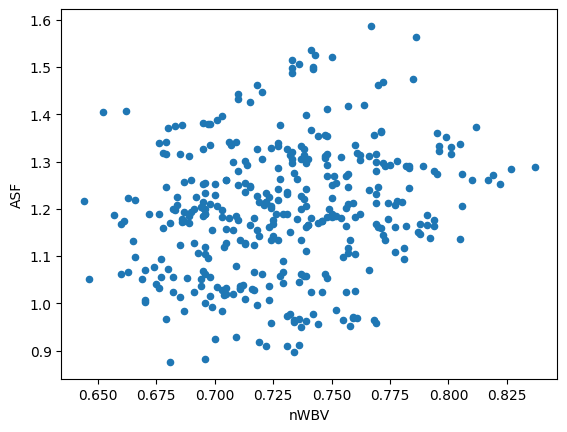

In [20]:
#nWBV Variable
df['nWBV'].hist()
#dependency
#potential dependencies
depVars = ['CDR','Group','ASF']
for var in depVars:
    df.plot.scatter(x = 'nWBV',y= var)

*No notable associations.*

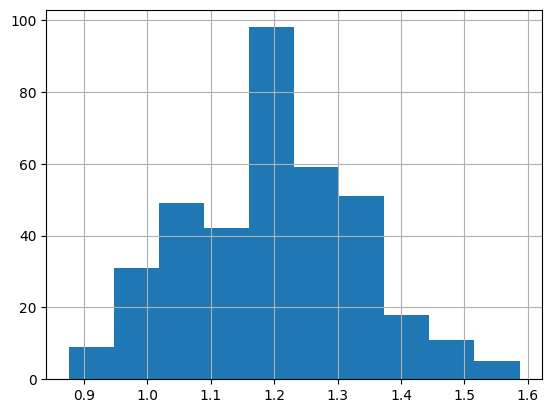

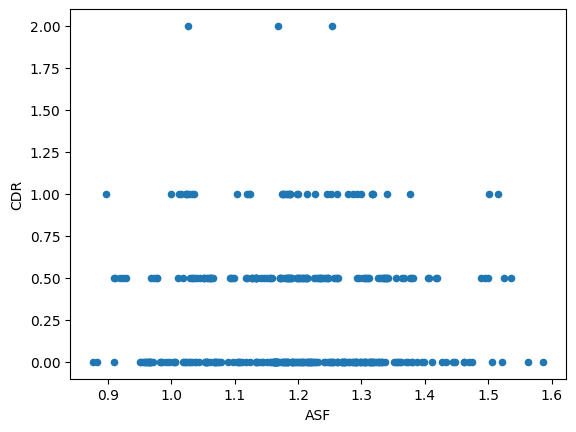

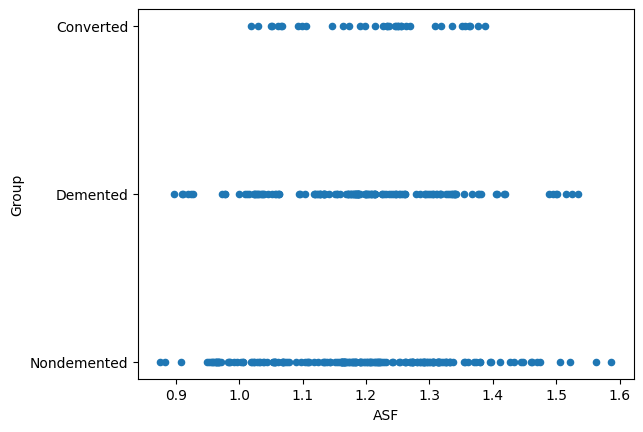

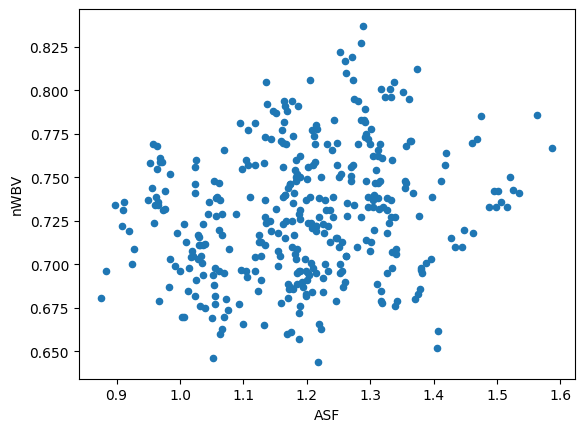

In [21]:
#ASF Variable
df['ASF'].hist()
#dependency
#potential dependencies
depVars = ['CDR','Group','nWBV']
for var in depVars:
    df.plot.scatter(x = 'ASF',y= var)

**Method for model training/running/testing**

In [22]:
def modelTesting(model,data):
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    #take final test set out
    training_data, testing_data = train_test_split(data,test_size=0.2)
    #5-fold Cross validation
    accuracies = []
    recalls = []
    precisions = []
    for n in range(5):
        train_data, test_data = train_test_split(training_data,test_size=0.2)
        #fit
        model.fit(train_data.drop('Group',axis=1),train_data['Group'])
        #accuracy
        score = model.score(test_data.drop('Group',axis=1),test_data['Group'])
        #recall/precision
        pred = model.predict(test_data.drop('Group',axis=1))
        recall = metrics.precision_score(test_data['Group'],pred,average='macro',zero_division=1)
        precision = metrics.recall_score(test_data['Group'],pred,average='micro')
        accuracies.append(score)
        recalls.append(recall)
        precisions.append(precision)
    #external validation
    score = model.score(testing_data.drop('Group',axis=1),testing_data['Group'])
    pred = model.predict(testing_data.drop('Group',axis=1))
    recall = metrics.precision_score(testing_data['Group'],pred,average='macro',zero_division=1)
    precision = metrics.recall_score(testing_data['Group'],pred,average='micro')
    return [[np.mean(accuracies),np.mean(recalls),np.mean(precisions)],[score,recall,precision]]

**Printing Results**

In [23]:
def printResults(results):
    import matplotlib.pyplot as plt
    print(results)
    x = np.arange(3)
    width = 0.4
    plt.bar(x-0.2, results[0], width, color='black')
    plt.bar(x+0.2, results[1], width, color='silver')
    plt.xticks(x, ['Accuracy', 'Recall', 'Precision'])
    plt.ylim(0.5,1)
    plt.legend(['Averaged Validation Data', 'External Test Data'])
    plt.show()

**Logistic Regression using sklearn library**

In [24]:
def logRegTest(data):
    from sklearn import linear_model
    print('\nun-resticted LogReg Model\n')
    logReg = linear_model.LogisticRegression(max_iter=50000,multi_class='ovr', solver='lbfgs')
    logRegData = modelTesting(logReg,data)
    printResults(logRegData)
    print('\nL2-Restricted LogReg Model\n')
    logRegL2 = linear_model.LogisticRegression(penalty='l2',max_iter=50000,multi_class='ovr', solver='lbfgs')
    logRegL2Data = modelTesting(logRegL2,data)
    printResults(logRegL2Data)

**Decision Tree Modeling using sklearn library**

In [25]:
def decTreeTest(data):   
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    print('\nun-resticted Decision Tree\n')
    decTreeFull = DecisionTreeClassifier()
    fullTreeResults = modelTesting(decTreeFull,data)
    printResults(fullTreeResults)
    print('\n10 layer max Decision Tree\n')
    decTree10 = DecisionTreeClassifier(max_depth=10)
    tenTreeResults = modelTesting(decTree10,data)
    printResults(tenTreeResults)
    print('\n5 layer max Decision Tree\n')
    decTree5 = DecisionTreeClassifier(max_depth=5)
    fiveTreeResults = modelTesting(decTree5,data)
    printResults(fiveTreeResults)
    plt.figure()
    x = [0,1,2]
    plt.bar(x,[fullTreeResults[1][0],tenTreeResults[1][0],fiveTreeResults[1][0]])
    plt.xticks(x, ['Full','10-Limit','5-Limit'])
    plt.title('Accuracy v. Tree Depth Max')
    plt.show()

**SVM Modeling using sklearn library**

In [67]:
def svcTest(data):
    import matplotlib.pyplot as plt
    from sklearn.svm import SVC
    accuracies = []
    for kernel in ['linear','poly','sigmoid','rbf']:
        suppVec = SVC(kernel=kernel)
        print('\n' + kernel + ' kernel:\n')
        result = modelTesting(suppVec,data)
        accuracies.append(result[1][1])
        printResults(result)
    plt.figure()
    x = [0,1,2,3]
    plt.bar(x,accuracies)
    plt.ylabel('Accuracy')
    plt.xticks(x, ['Linear','Poly','Sigmoid','RBF'])
    plt.title('Accuracy v. Kernel used')
    return accuracies[0]

In [68]:
def fullRun(data):
    print('LOGISTIC REGRESSION \n')
    logRegTest(data)
    print('\n DECISION TREE \n')
    decTreeTest(data)
    print('\n SUPPORT VECTOR MACHINE \n')
    targAcc = svcTest(data)
    return targAcc

**Raw Full Data Run**

In [69]:
linKernelAcc = []

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.7666666666666667, 0.782683930152169, 0.7666666666666667], [0.8, 0.8725490196078431, 0.8]]


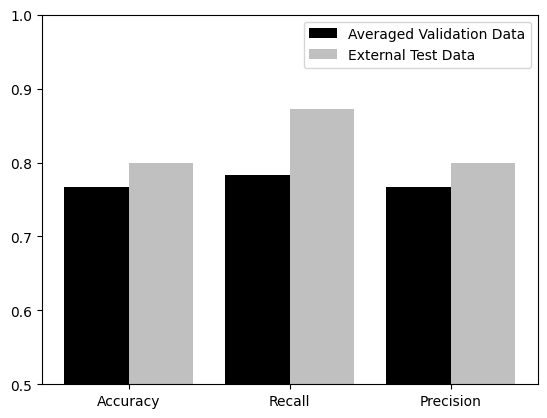


L2-Restricted LogReg Model

[[0.7300000000000001, 0.7658046186447984, 0.7300000000000001], [0.8533333333333334, 0.9052579365079364, 0.8533333333333334]]


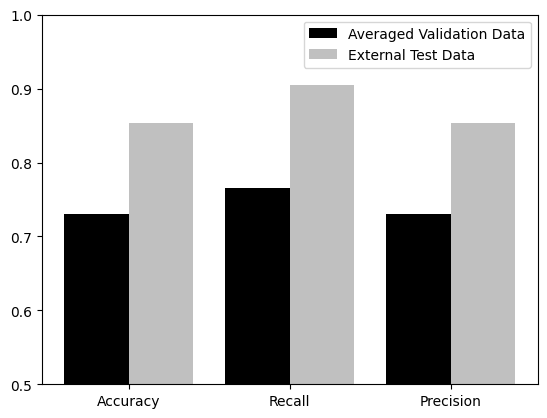


 DECISION TREE 


un-resticted Decision Tree

[[0.6866666666666666, 0.555344679029103, 0.6866666666666666], [0.7466666666666667, 0.6480392156862744, 0.7466666666666667]]


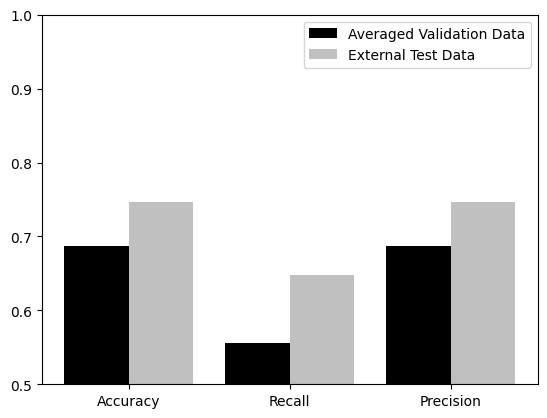


10 layer max Decision Tree

[[0.7133333333333334, 0.617341152674486, 0.7133333333333334], [0.7733333333333333, 0.6568986568986569, 0.7733333333333333]]


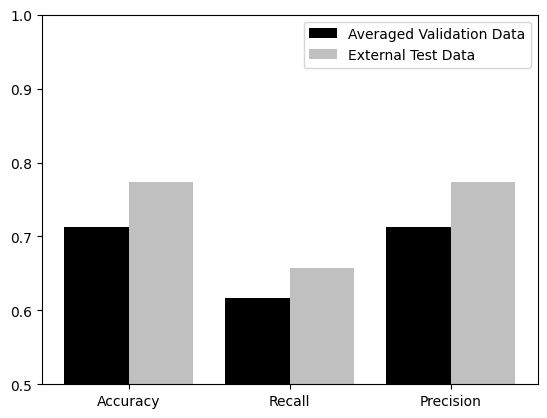


5 layer max Decision Tree

[[0.6966666666666667, 0.5499940272173868, 0.6966666666666667], [0.7733333333333333, 0.7058201058201058, 0.7733333333333333]]


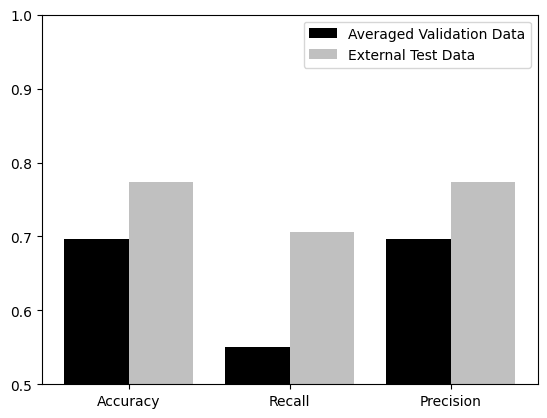

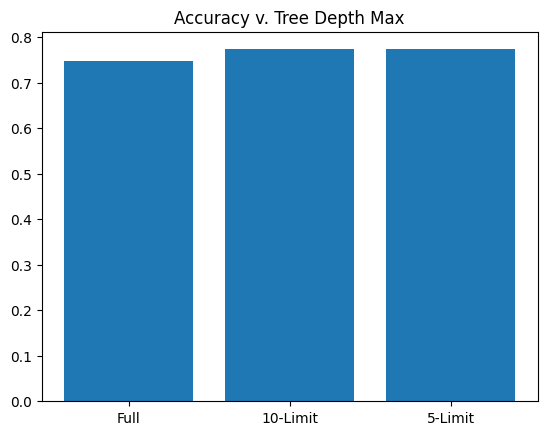


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.7699999999999999, 0.7276629206979014, 0.7699999999999999], [0.7733333333333333, 0.8468660968660968, 0.7733333333333333]]


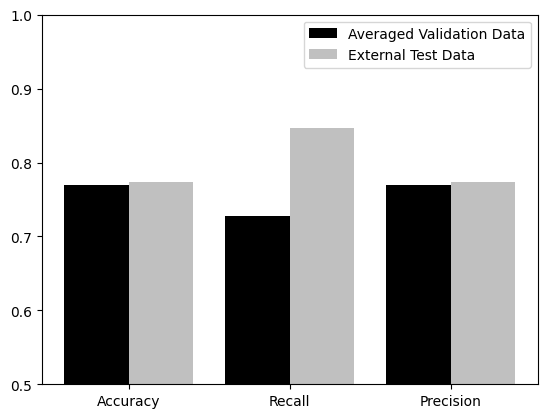


poly kernel:

[[0.48, 0.8266666666666668, 0.48], [0.5466666666666666, 0.8488888888888889, 0.5466666666666666]]


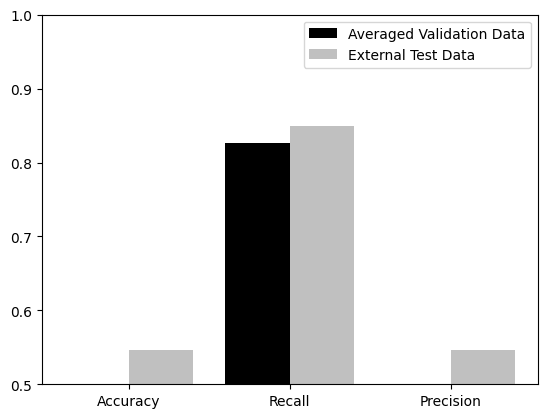


sigmoid kernel:

[[0.5466666666666666, 0.8488888888888889, 0.5466666666666666], [0.4, 0.7999999999999999, 0.4]]


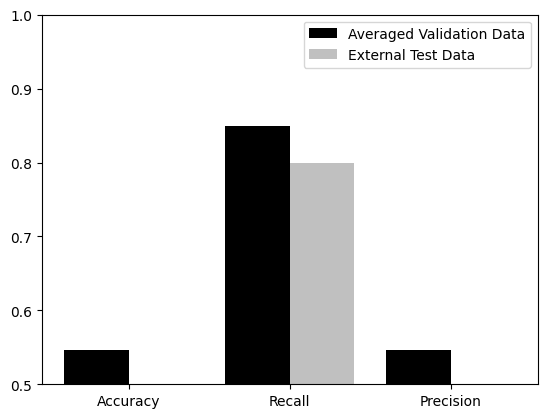


rbf kernel:

[[0.4833333333333333, 0.8277777777777778, 0.4833333333333333], [0.5066666666666667, 0.8355555555555556, 0.5066666666666667]]


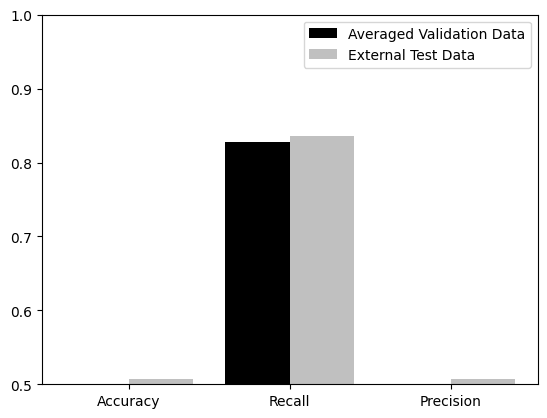

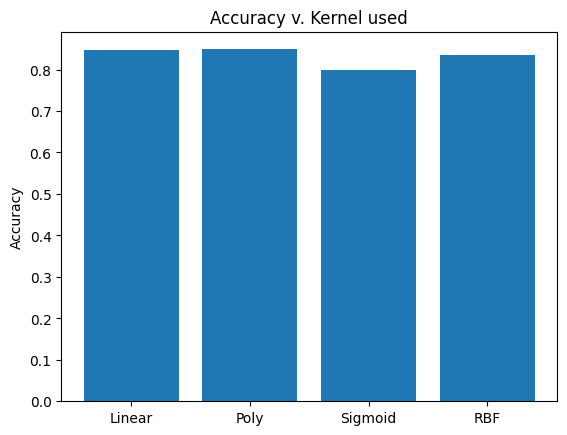

In [70]:
rawFullData = df[['Visit','M/F','Age','EDUC','SES','MMSE','Group','eTIV','nWBV','ASF']]
#enumerating gender (M=1,F=0)
rawFullData = rawFullData.replace(['M','F'],[0,1])
#enumerating group (Non=0, Demented=1, Converted=2)
rawFullData = rawFullData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(rawFullData))

**Standardized Full Run**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.8, 0.8669862330907282, 0.8], [0.76, 0.8355822088955523, 0.76]]


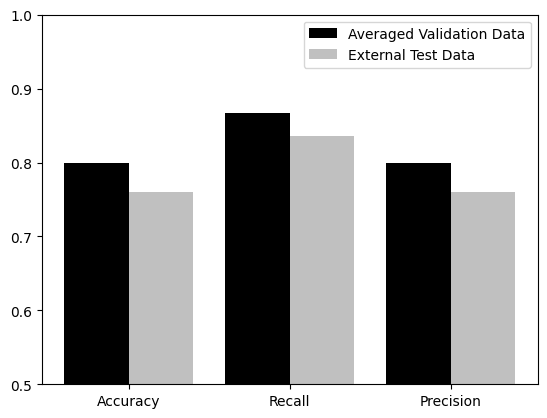


L2-Restricted LogReg Model

[[0.7933333333333333, 0.7427336493898278, 0.7933333333333333], [0.6933333333333334, 0.8098729227761486, 0.6933333333333334]]


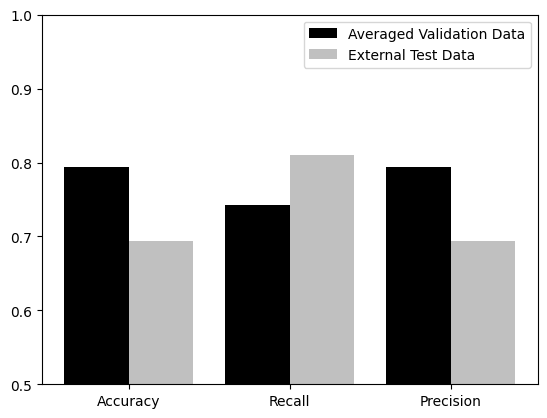


 DECISION TREE 


un-resticted Decision Tree

[[0.7066666666666667, 0.6207795331808326, 0.7066666666666667], [0.7466666666666667, 0.6123456790123457, 0.7466666666666667]]


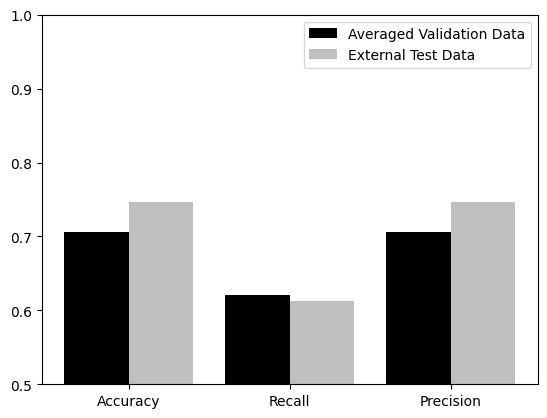


10 layer max Decision Tree

[[0.7433333333333334, 0.6483330249996917, 0.7433333333333334], [0.6933333333333334, 0.548926806991323, 0.6933333333333334]]


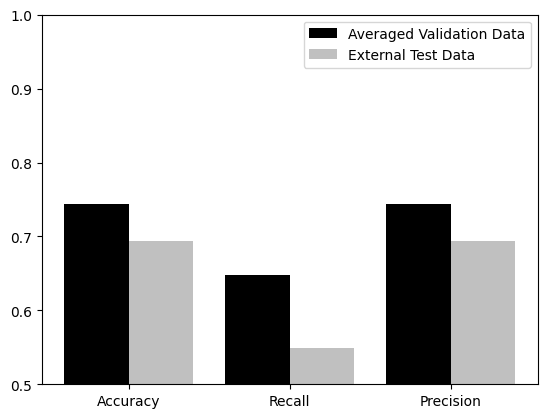


5 layer max Decision Tree

[[0.7200000000000001, 0.6934802584862114, 0.7200000000000001], [0.7733333333333333, 0.5318007662835248, 0.7733333333333333]]


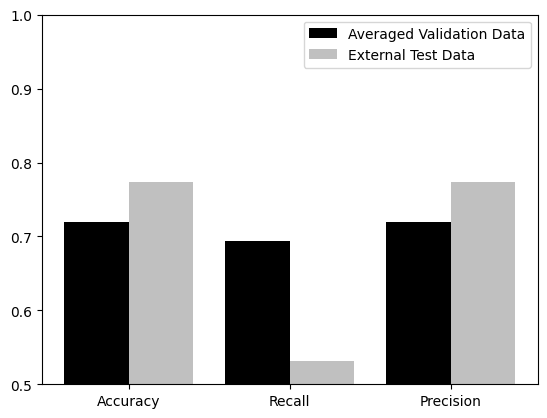

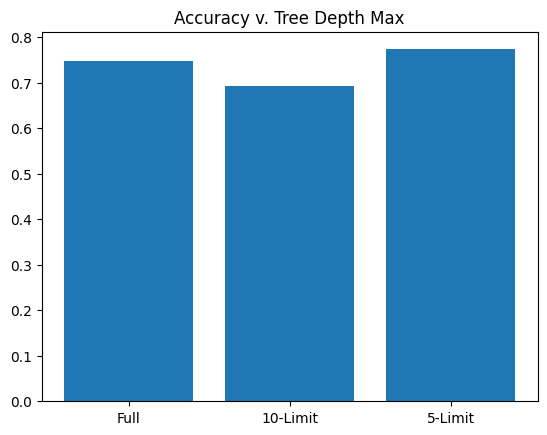


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.7733333333333333, 0.7854830046496714, 0.7733333333333333], [0.7866666666666666, 0.8684210526315789, 0.7866666666666666]]


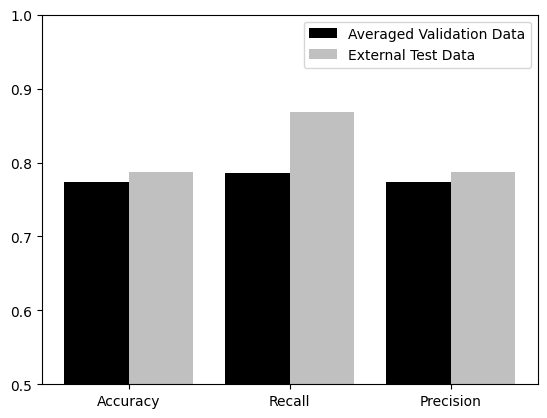


poly kernel:

[[0.72, 0.7714634383737161, 0.72], [0.72, 0.8813559322033898, 0.72]]


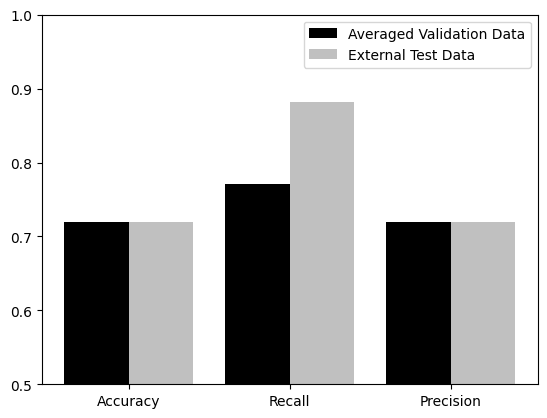


sigmoid kernel:

[[0.7333333333333334, 0.7695338428832457, 0.7333333333333334], [0.6933333333333334, 0.8262339418526031, 0.6933333333333334]]


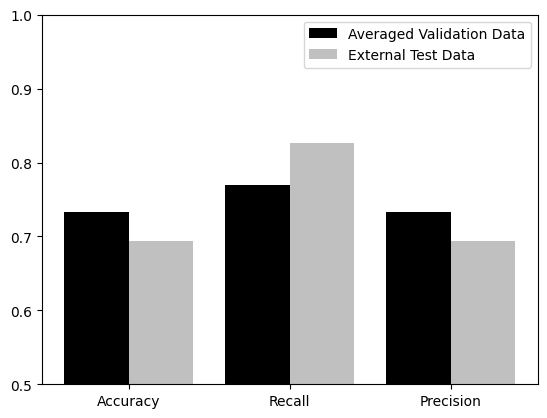


rbf kernel:

[[0.74, 0.863744189738448, 0.74], [0.68, 0.8057413600891862, 0.68]]


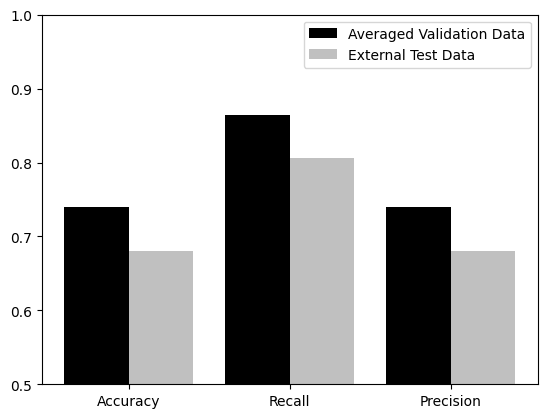

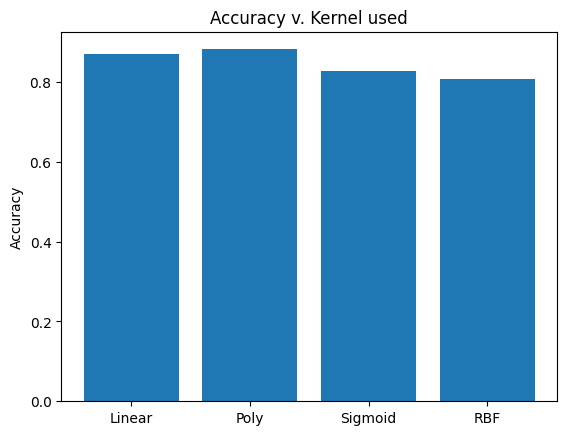

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedFullData = pd.DataFrame(scaler.fit_transform(df[['Visit','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF']]),columns=['Visit','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF'])
#adding categoricals back in
standardizedFullData['Group'] = df['Group']
standardizedFullData['M/F'] = df['M/F']
standardizedFullData = standardizedFullData.replace(['M','F'],[0,1])
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedFullData = standardizedFullData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedFullData))

**Standardized Visit 1 ONLY full run**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.6583333333333333, 0.7829765441530148, 0.6583333333333333], [0.5666666666666667, 0.3737373737373737, 0.5666666666666667]]


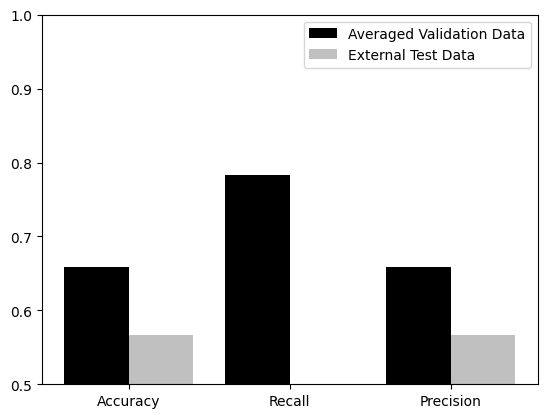


L2-Restricted LogReg Model

[[0.6166666666666666, 0.7482756622462505, 0.6166666666666666], [0.6333333333333333, 0.7537878787878788, 0.6333333333333333]]


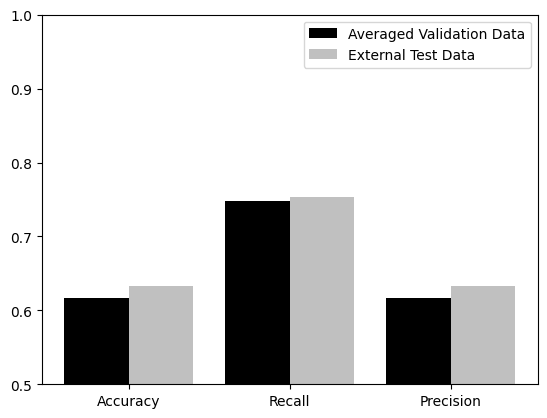


 DECISION TREE 


un-resticted Decision Tree

[[0.5, 0.494008769008769, 0.5], [0.5333333333333333, 0.6892911010558068, 0.5333333333333333]]


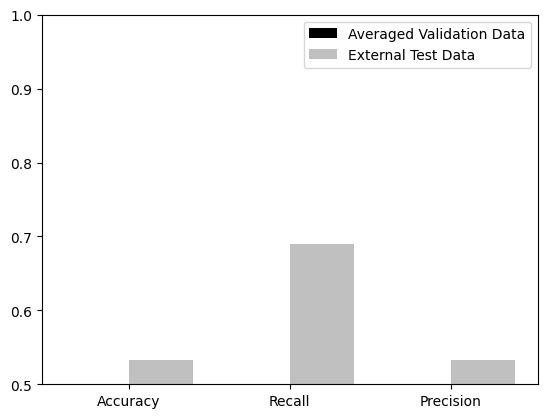


10 layer max Decision Tree

[[0.4833333333333333, 0.3935476511792301, 0.4833333333333333], [0.4666666666666667, 0.36904761904761907, 0.4666666666666667]]


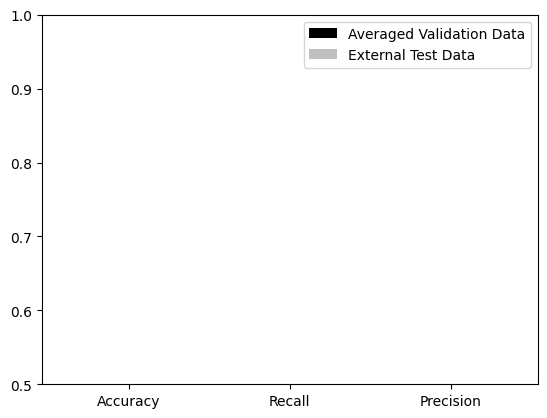


5 layer max Decision Tree

[[0.5999999999999999, 0.5197197573668163, 0.5999999999999999], [0.5, 0.35714285714285715, 0.5]]


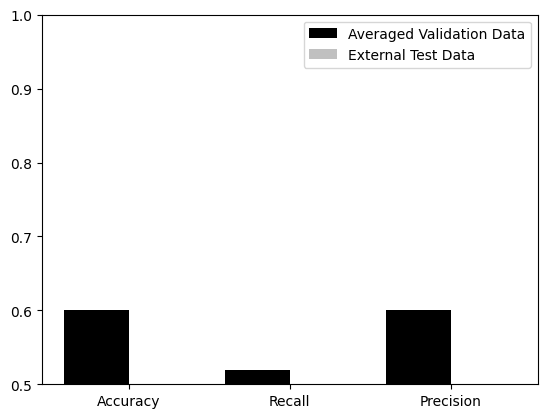

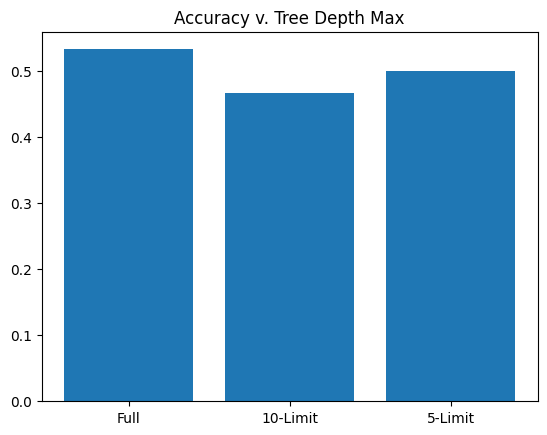


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.6333333333333333, 0.7494482859188741, 0.6333333333333333], [0.8, 0.8796296296296297, 0.8]]


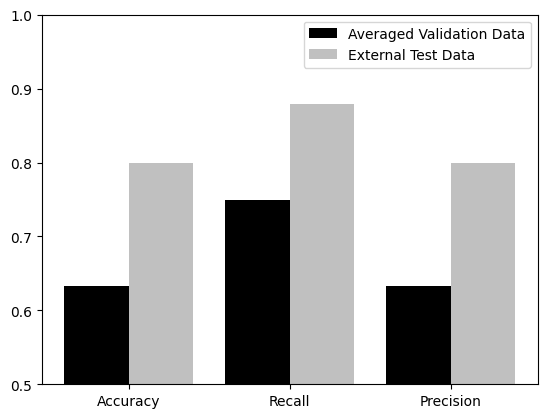


poly kernel:

[[0.5416666666666667, 0.7057079567605883, 0.5416666666666667], [0.5666666666666667, 0.7081339712918661, 0.5666666666666667]]


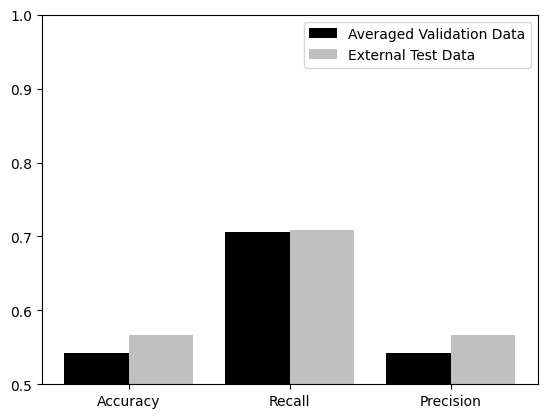


sigmoid kernel:

[[0.65, 0.7684878084878085, 0.65], [0.6666666666666666, 0.65625, 0.6666666666666666]]


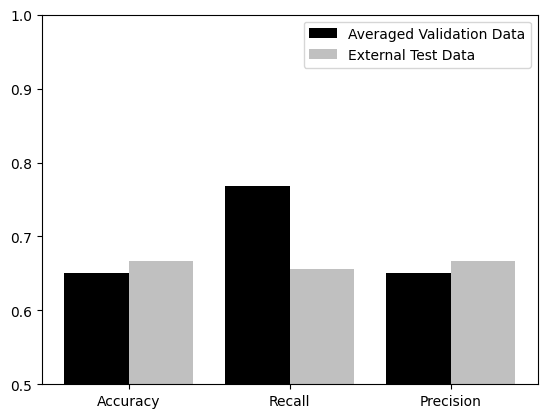


rbf kernel:

[[0.6083333333333333, 0.7407827575474635, 0.6083333333333333], [0.4666666666666667, 0.6333333333333333, 0.4666666666666667]]


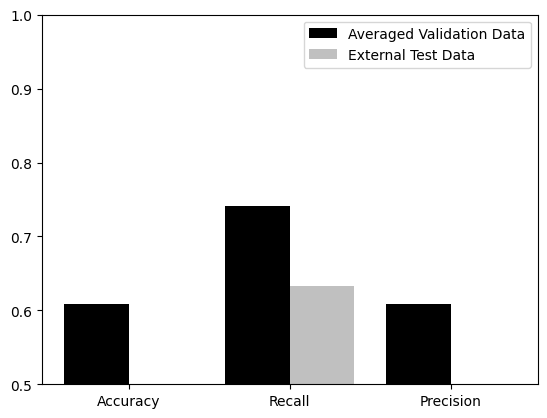

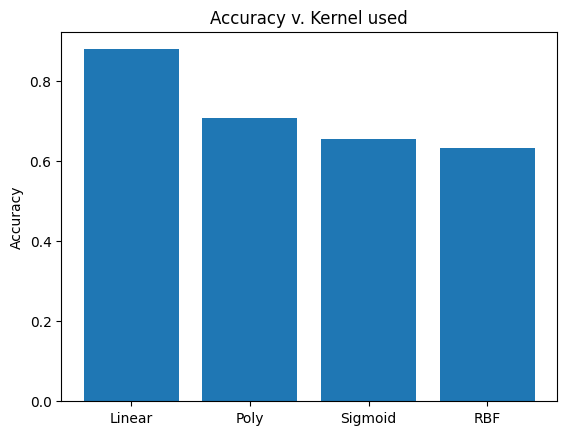

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
v1data = df[df['Visit']==1]
v1standardizedFullData = pd.DataFrame(scaler.fit_transform(v1data[['Visit','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF']]),columns=['Visit','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF'])
#adding categoricals back in
v1standardizedFullData['Group'] = df['Group']
v1standardizedFullData['M/F'] = df['M/F']
v1standardizedFullData = v1standardizedFullData.replace(['M','F'],[0,1])
#enumerating group (Non=0, Demented=1, Converted=2)
v1standardizedFullData = v1standardizedFullData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(v1standardizedFullData))

**Raw Neuro Run**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.4766666666666667, 0.8255555555555556, 0.4766666666666667], [0.5866666666666667, 0.8622222222222223, 0.5866666666666667]]


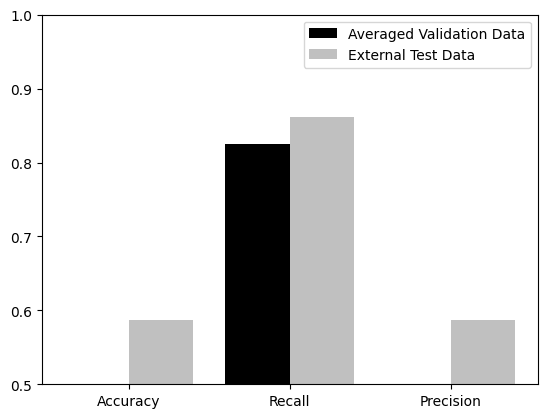


L2-Restricted LogReg Model

[[0.49000000000000005, 0.8300000000000001, 0.49000000000000005], [0.4533333333333333, 0.8177777777777777, 0.4533333333333333]]


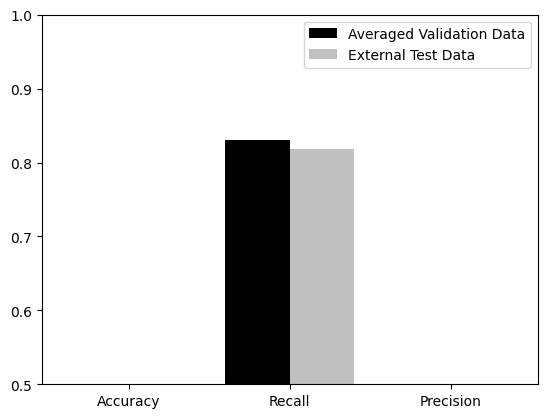


 DECISION TREE 


un-resticted Decision Tree

[[0.6033333333333333, 0.4973480375018231, 0.6033333333333333], [0.5733333333333334, 0.5114638447971781, 0.5733333333333334]]


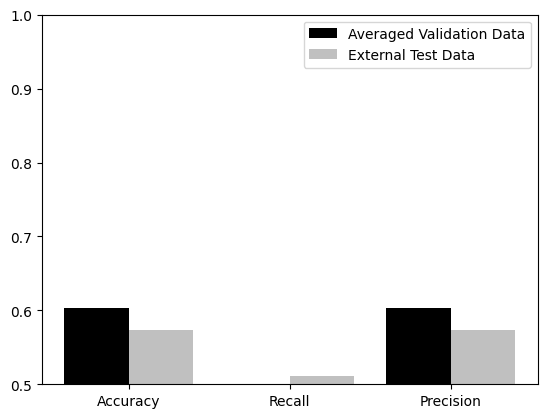


10 layer max Decision Tree

[[0.5533333333333335, 0.5205688755688755, 0.5533333333333335], [0.6666666666666666, 0.5601604278074866, 0.6666666666666666]]


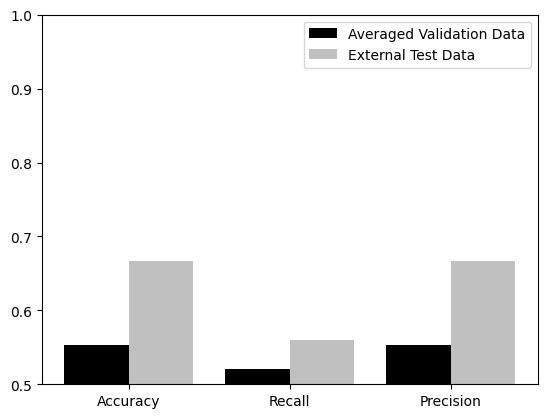


5 layer max Decision Tree

[[0.5533333333333333, 0.5175251917155965, 0.5533333333333333], [0.6266666666666667, 0.4376344086021506, 0.6266666666666667]]


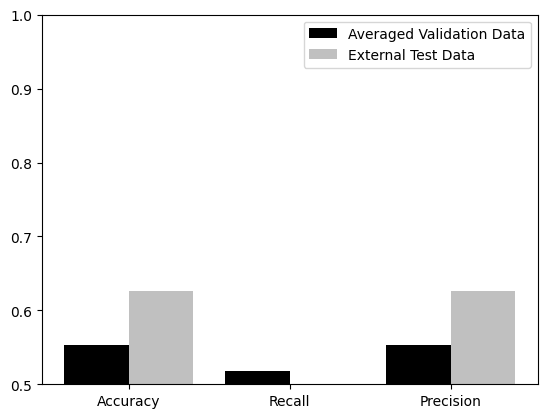

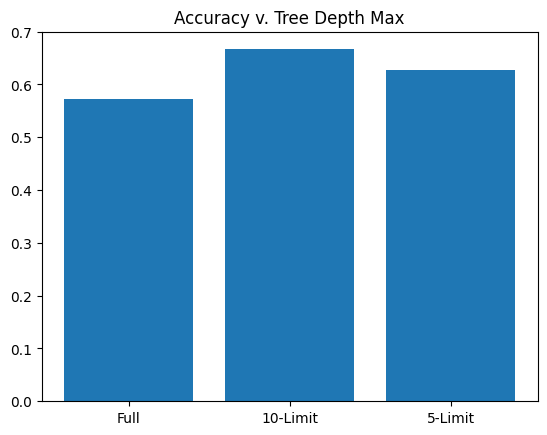


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.5133333333333334, 0.7957142857142858, 0.5133333333333334], [0.5466666666666666, 0.8488888888888889, 0.5466666666666666]]


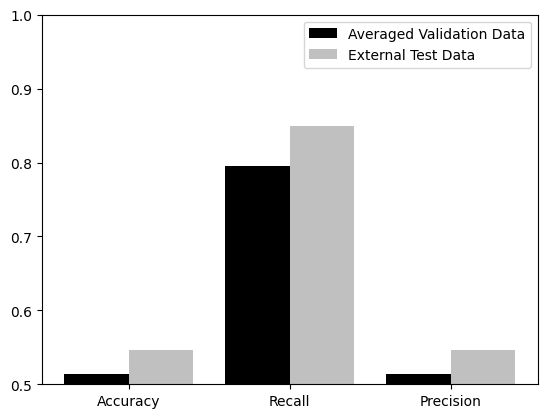


poly kernel:

[[0.47333333333333333, 0.8244444444444445, 0.47333333333333333], [0.49333333333333335, 0.831111111111111, 0.49333333333333335]]


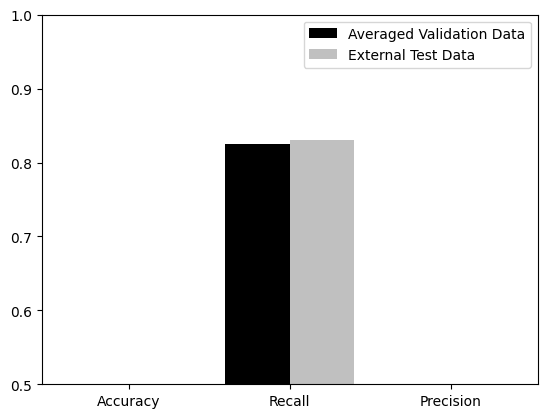


sigmoid kernel:

[[0.5233333333333333, 0.8405461393596987, 0.5233333333333333], [0.48, 0.8266666666666667, 0.48]]


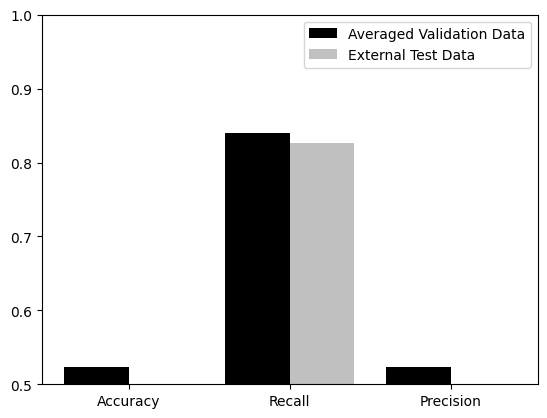


rbf kernel:

[[0.5333333333333334, 0.8444444444444444, 0.5333333333333334], [0.5333333333333333, 0.8444444444444444, 0.5333333333333333]]


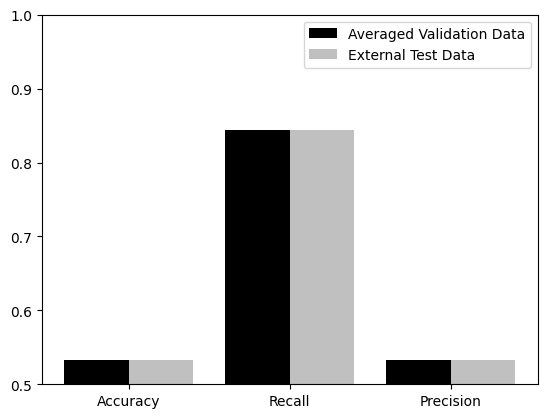

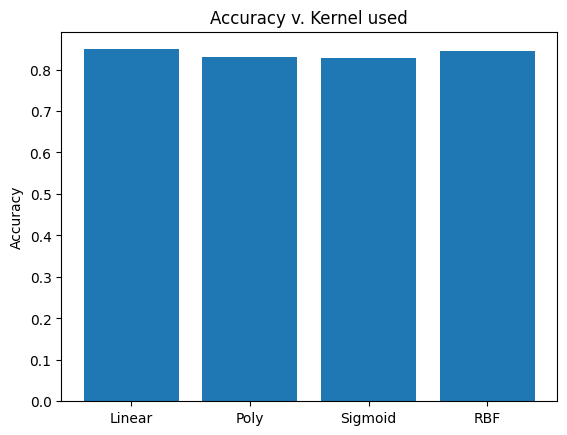

In [73]:
rawNeuroData = df[['Group','eTIV','nWBV','ASF']]
#enumerating group (Non=0, Demented=1, Converted=2)
rawNeuroData = rawNeuroData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(rawNeuroData))

**Standardized Neuro Run**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.5066666666666666, 0.6757575052205476, 0.5066666666666666], [0.68, 0.7793603198400799, 0.68]]


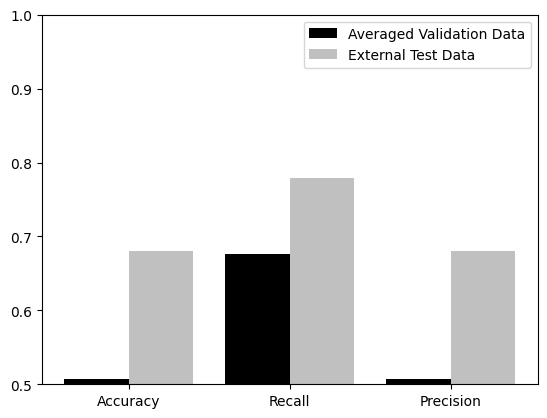


L2-Restricted LogReg Model

[[0.6233333333333333, 0.7395286935286935, 0.6233333333333333], [0.5333333333333333, 0.6887112403100776, 0.5333333333333333]]


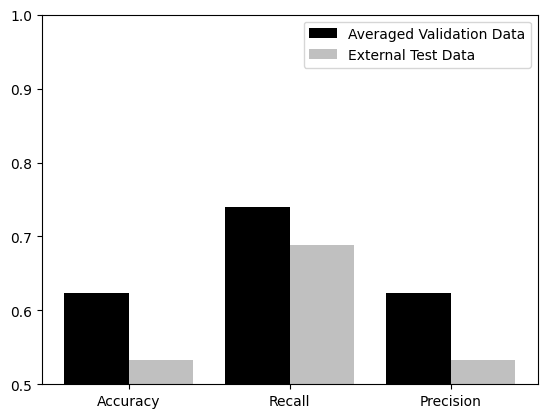


 DECISION TREE 


un-resticted Decision Tree

[[0.6033333333333334, 0.5543027306645021, 0.6033333333333334], [0.6133333333333333, 0.41991991991991995, 0.6133333333333333]]


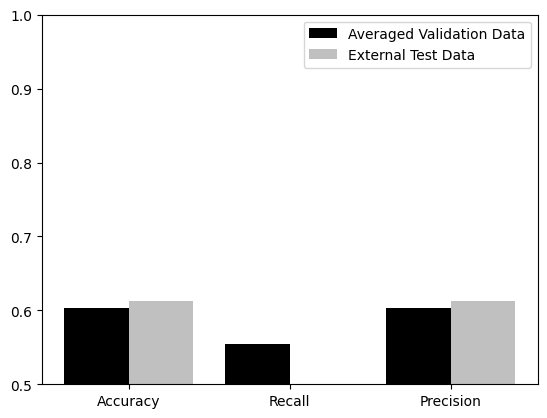


10 layer max Decision Tree

[[0.5966666666666667, 0.4976879884233707, 0.5966666666666667], [0.56, 0.47229235880398673, 0.56]]


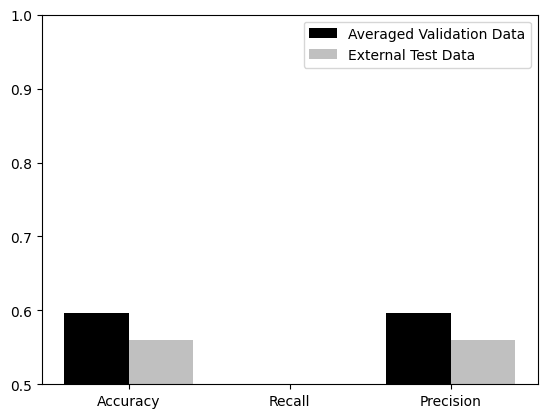


5 layer max Decision Tree

[[0.5866666666666667, 0.5328491879153359, 0.5866666666666667], [0.52, 0.726120857699805, 0.52]]


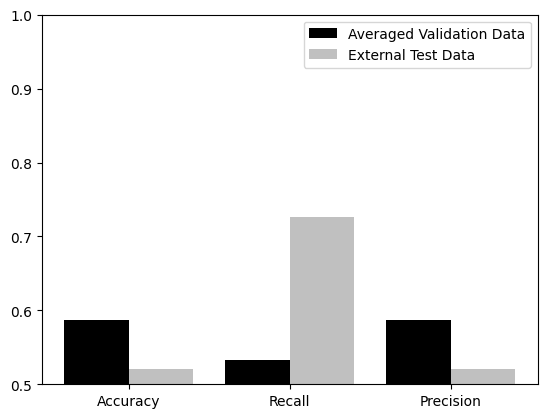

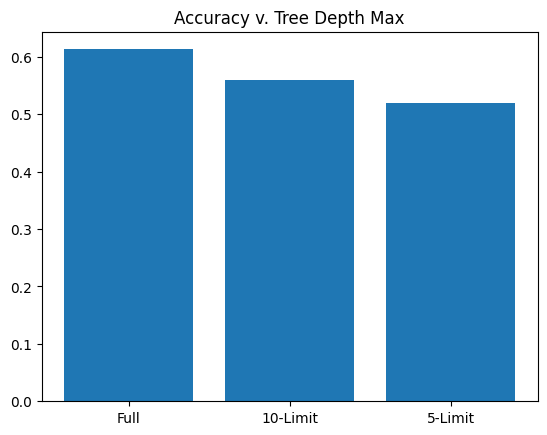


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.5800000000000001, 0.7165982548965005, 0.5800000000000001], [0.64, 0.7571225071225071, 0.64]]


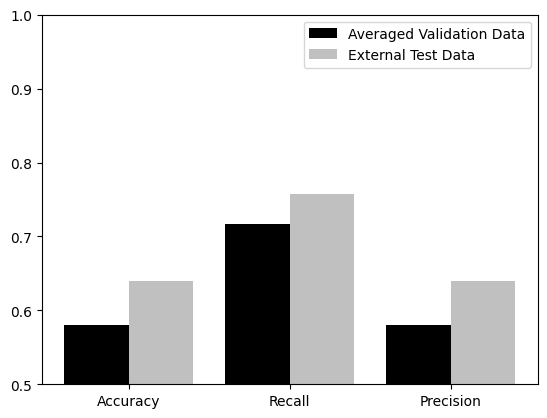


poly kernel:

[[0.51, 0.6703084088600182, 0.51], [0.49333333333333335, 0.6133167907361455, 0.49333333333333335]]


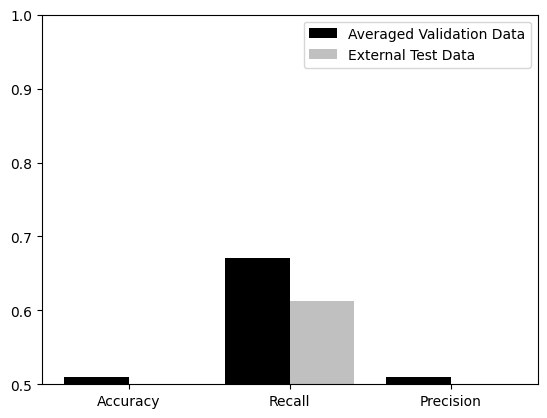


sigmoid kernel:

[[0.4866666666666667, 0.5807863487275252, 0.4866666666666667], [0.5066666666666667, 0.3444075304540421, 0.5066666666666667]]


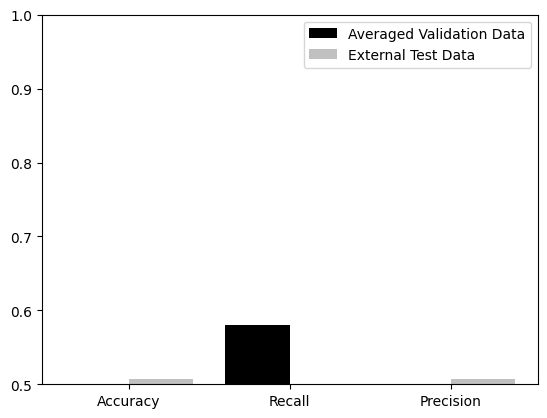


rbf kernel:

[[0.5233333333333333, 0.6868261100145159, 0.5233333333333333], [0.6266666666666667, 0.7296296296296297, 0.6266666666666667]]


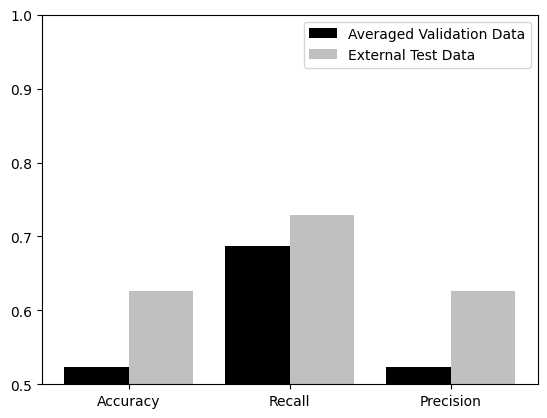

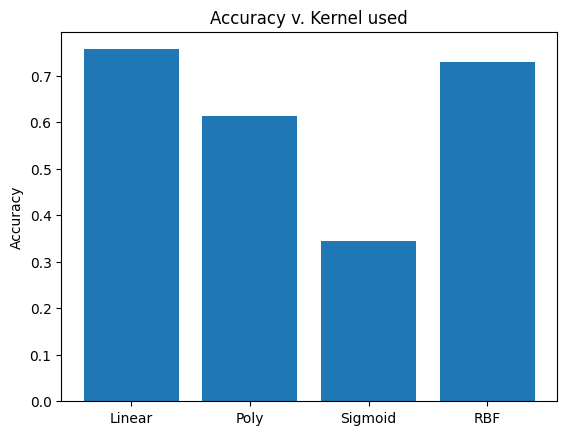

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedNeuroData = pd.DataFrame(scaler.fit_transform(df[['eTIV','nWBV','ASF']]),columns=['eTIV','nWBV','ASF'])
standardizedNeuroData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroData = standardizedNeuroData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroData))

**Visit 1 Standardized Neuro Run**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.4833333333333333, 0.7072108553566354, 0.4833333333333333], [0.5, 0.8333333333333334, 0.5]]


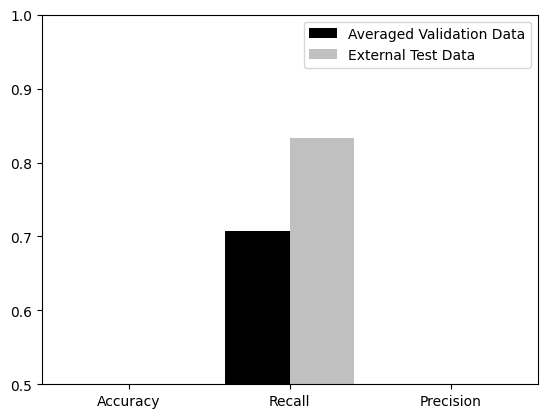


L2-Restricted LogReg Model

[[0.4083333333333333, 0.6262393162393162, 0.4083333333333333], [0.5, 0.587121212121212, 0.5]]


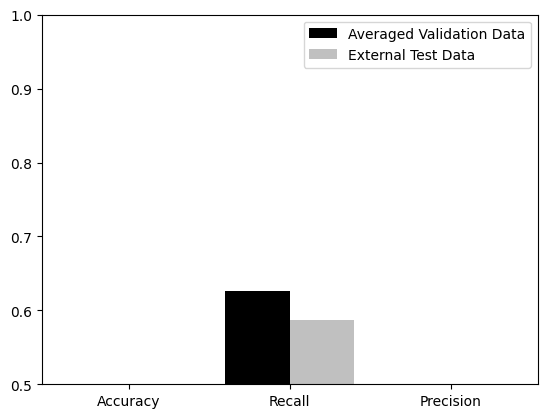


 DECISION TREE 


un-resticted Decision Tree

[[0.3166666666666667, 0.23028154851684263, 0.3166666666666667], [0.43333333333333335, 0.34607843137254907, 0.43333333333333335]]


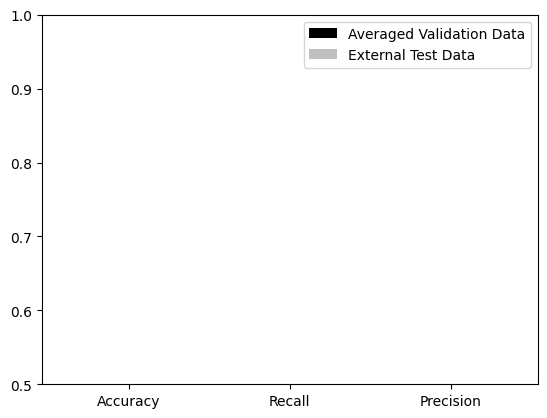


10 layer max Decision Tree

[[0.4333333333333333, 0.3690652811241046, 0.4333333333333333], [0.4, 0.24210526315789474, 0.4]]


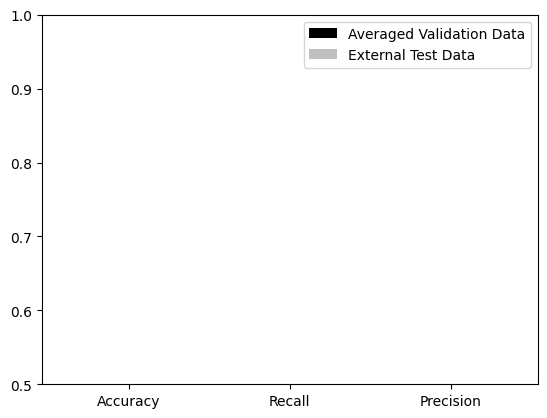


5 layer max Decision Tree

[[0.45, 0.48704326174914414, 0.45], [0.36666666666666664, 0.2435897435897436, 0.36666666666666664]]


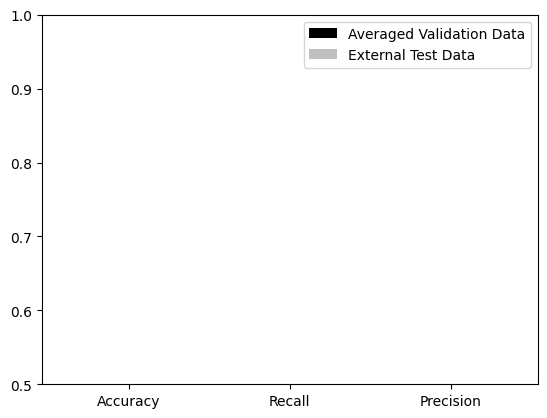

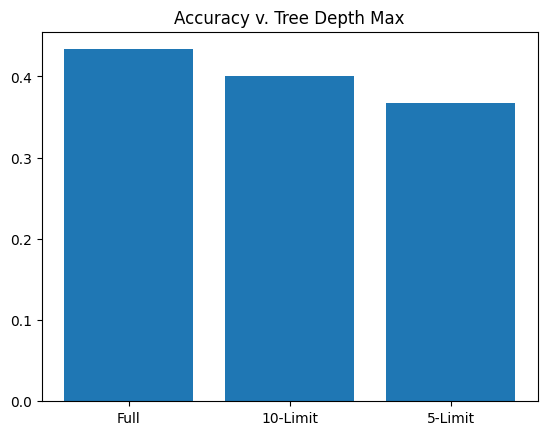


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.5333333333333333, 0.8291666666666666, 0.5333333333333333], [0.4, 0.7999999999999999, 0.4]]


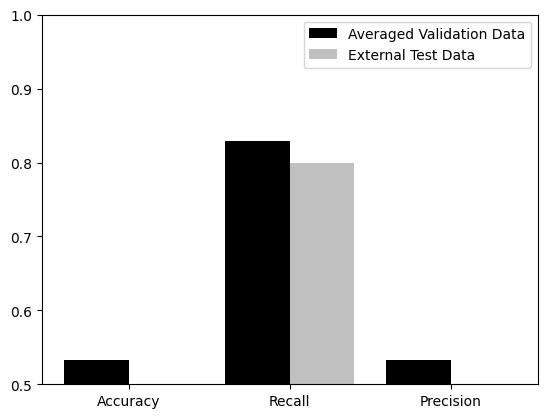


poly kernel:

[[0.35833333333333334, 0.6331299262649377, 0.35833333333333334], [0.7333333333333333, 0.3793103448275862, 0.7333333333333333]]


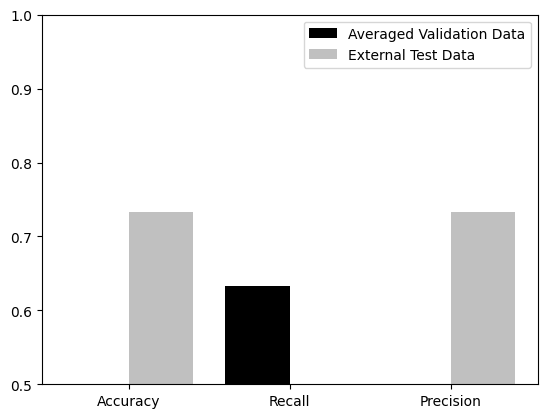


sigmoid kernel:

[[0.4583333333333333, 0.617653063883714, 0.4583333333333333], [0.5, 0.7163561076604555, 0.5]]


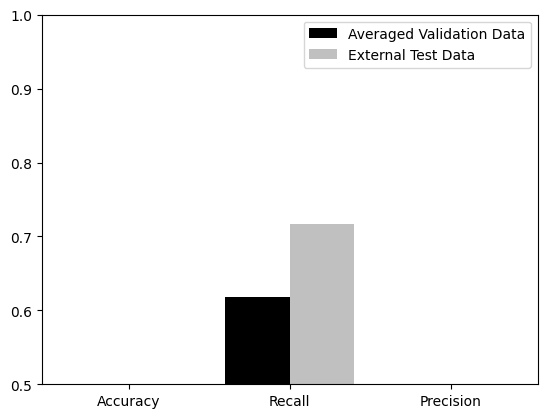


rbf kernel:

[[0.475, 0.7094241037376048, 0.475], [0.4666666666666667, 0.4942528735632184, 0.4666666666666667]]


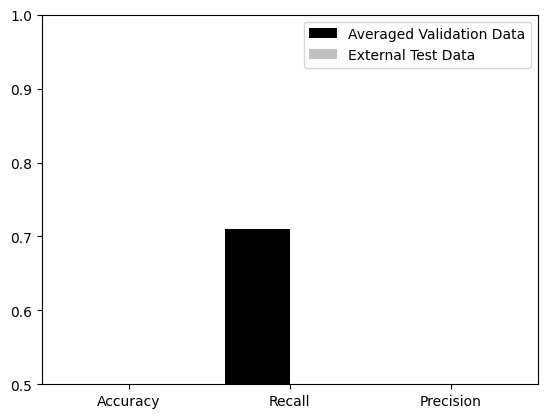

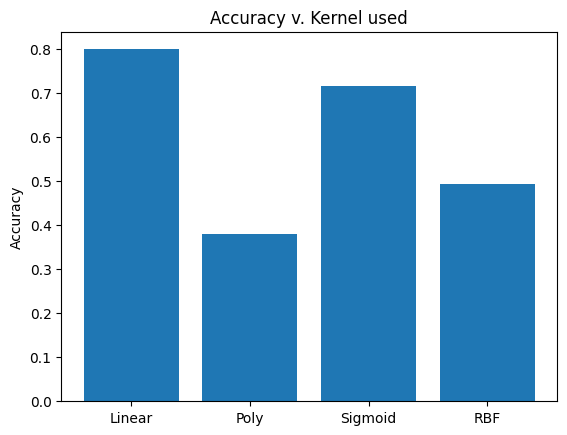

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
v1data = df[df['Visit']==1]
standardizedNeuroData = pd.DataFrame(scaler.fit_transform(v1data[['eTIV','nWBV','ASF']]),columns=['eTIV','nWBV','ASF'])
standardizedNeuroData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroData = standardizedNeuroData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroData))

**Standardized Neuro + MMSE Data**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.7533333333333333, 0.8469513684731076, 0.7533333333333333], [0.8133333333333334, 0.8862715298885512, 0.8133333333333334]]


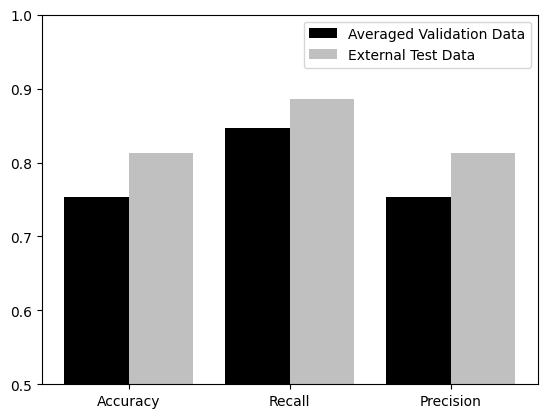


L2-Restricted LogReg Model

[[0.7566666666666666, 0.8458921237560517, 0.7566666666666666], [0.6933333333333334, 0.8283166109253065, 0.6933333333333334]]


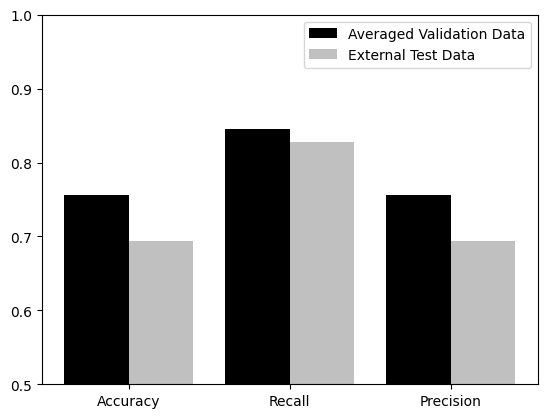


 DECISION TREE 


un-resticted Decision Tree

[[0.6066666666666667, 0.5192581647210583, 0.6066666666666667], [0.7333333333333333, 0.5278716216216216, 0.7333333333333333]]


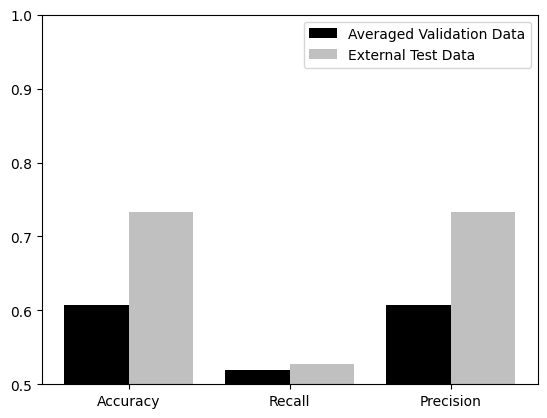


10 layer max Decision Tree

[[0.6933333333333332, 0.5470434155216763, 0.6933333333333332], [0.68, 0.6035714285714285, 0.68]]


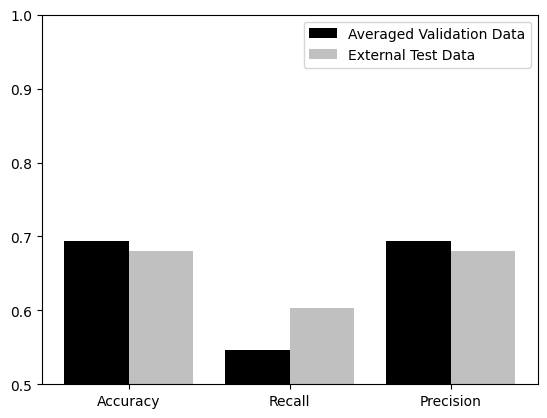


5 layer max Decision Tree

[[0.6366666666666666, 0.4707530431347567, 0.6366666666666666], [0.7866666666666666, 0.8533724340175953, 0.7866666666666666]]


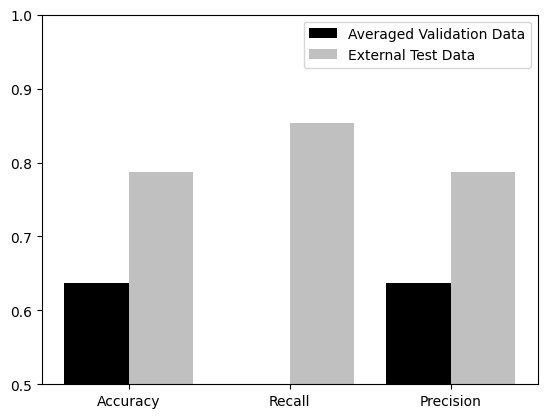

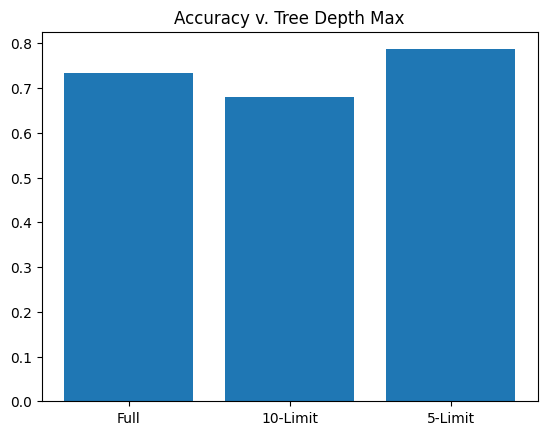


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.7533333333333334, 0.8551917150143694, 0.7533333333333334], [0.7733333333333333, 0.8520923520923521, 0.7733333333333333]]


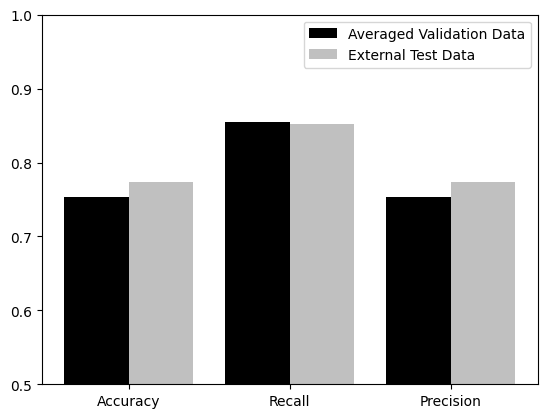


poly kernel:

[[0.6633333333333332, 0.8204156480743474, 0.6633333333333332], [0.6666666666666666, 0.8450429352068696, 0.6666666666666666]]


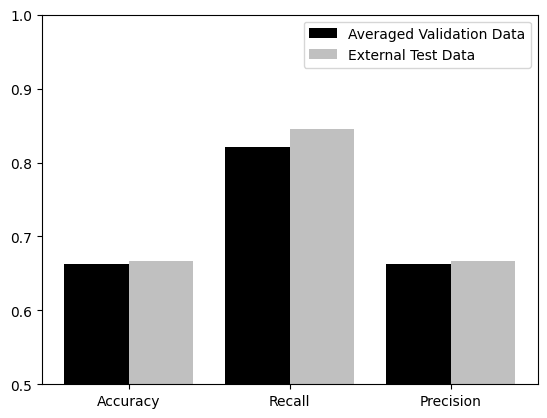


sigmoid kernel:

[[0.6633333333333333, 0.5910731716477271, 0.6633333333333333], [0.7333333333333333, 0.5094130675526024, 0.7333333333333333]]


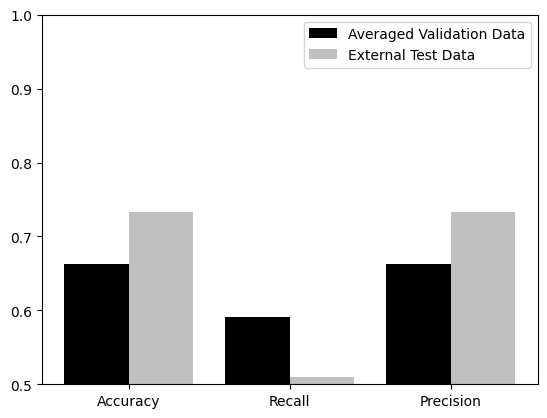


rbf kernel:

[[0.78, 0.8782522920544074, 0.78], [0.7466666666666667, 0.8666666666666667, 0.7466666666666667]]


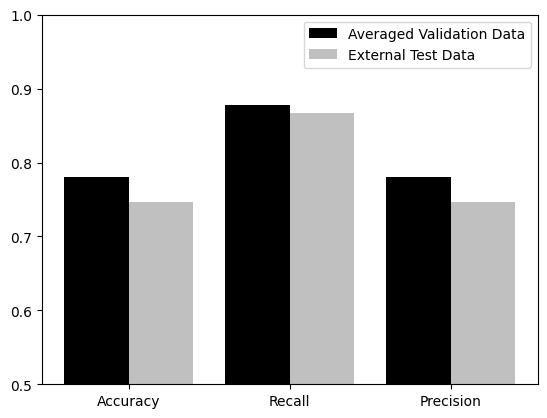

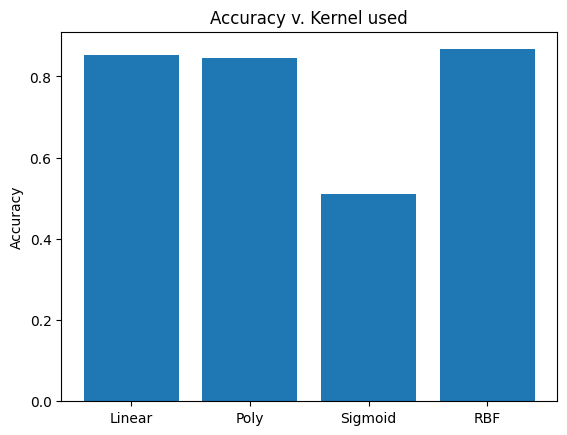

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedNeuroData = pd.DataFrame(scaler.fit_transform(df[['MMSE','eTIV','nWBV','ASF']]),columns=['MMSE','eTIV','nWBV','ASF'])
standardizedNeuroData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroData = standardizedNeuroData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroData))

**Visit 1 Standardized Neuro + MMSE Data**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.4583333333333333, 0.6525828460038986, 0.4583333333333333], [0.4666666666666667, 0.8222222222222223, 0.4666666666666667]]


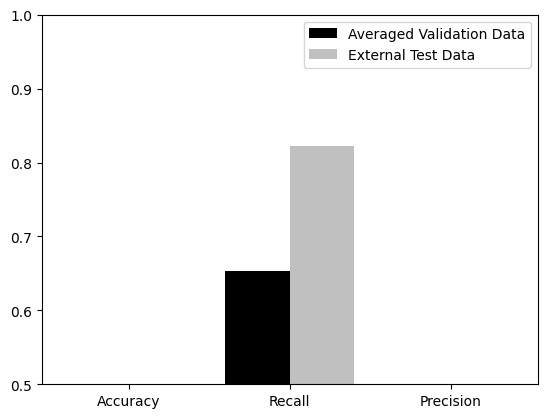


L2-Restricted LogReg Model

[[0.4583333333333333, 0.7451296720061023, 0.4583333333333333], [0.5, 0.5833333333333334, 0.5]]


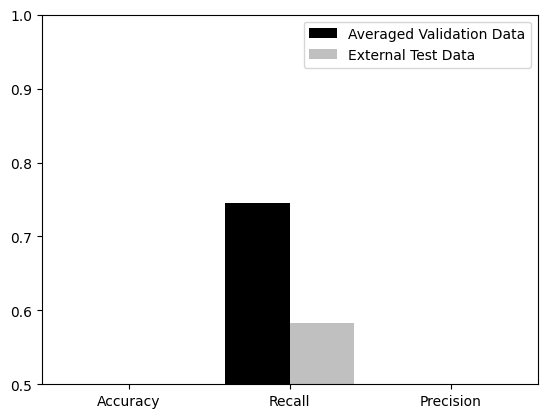


 DECISION TREE 


un-resticted Decision Tree

[[0.4083333333333333, 0.4175457875457875, 0.4083333333333333], [0.36666666666666664, 0.24206349206349206, 0.36666666666666664]]


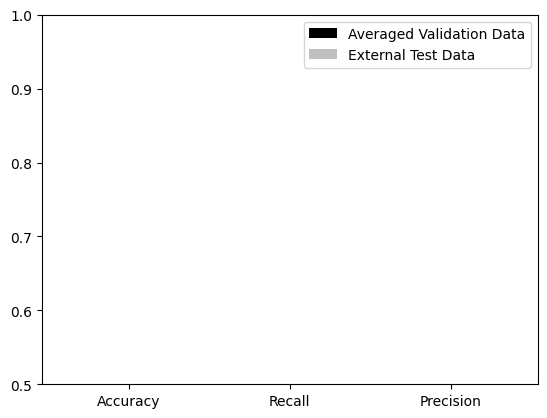


10 layer max Decision Tree

[[0.375, 0.3117003367003367, 0.375], [0.4666666666666667, 0.3746031746031746, 0.4666666666666667]]


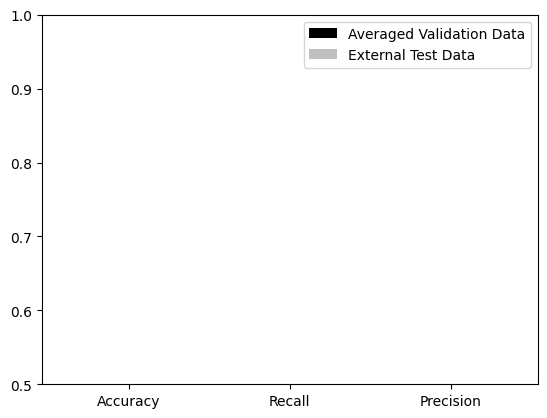


5 layer max Decision Tree

[[0.4416666666666666, 0.4917779769250358, 0.4416666666666666], [0.4666666666666667, 0.48809523809523814, 0.4666666666666667]]


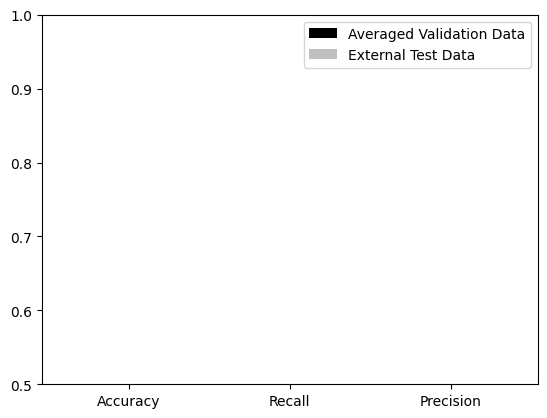

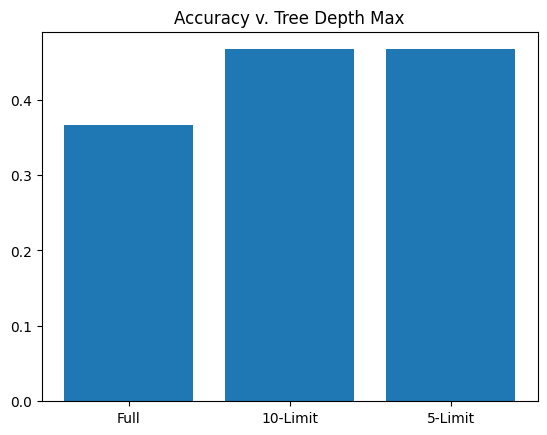


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.5916666666666666, 0.8125, 0.5916666666666666], [0.26666666666666666, 0.5, 0.26666666666666666]]


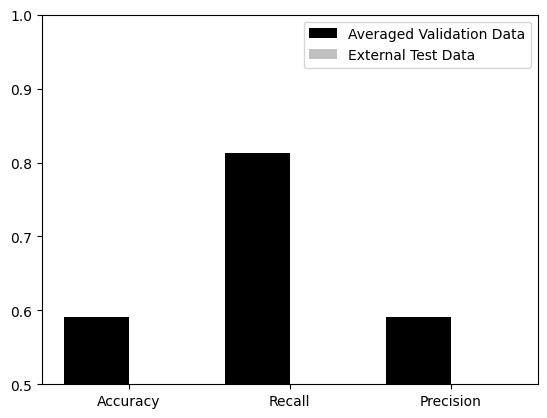


poly kernel:

[[0.3916666666666667, 0.5342279942279943, 0.3916666666666667], [0.5333333333333333, 0.5172413793103449, 0.5333333333333333]]


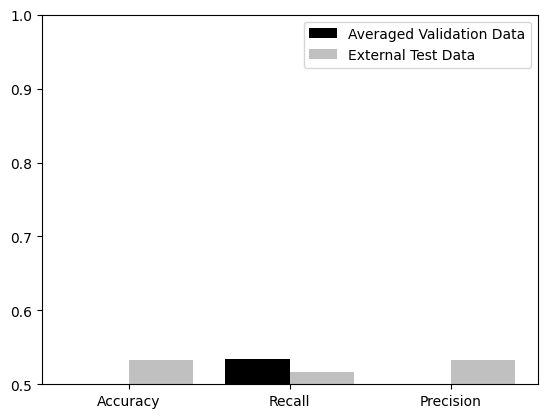


sigmoid kernel:

[[0.3916666666666667, 0.5121417069243156, 0.3916666666666667], [0.6333333333333333, 0.8735632183908045, 0.6333333333333333]]


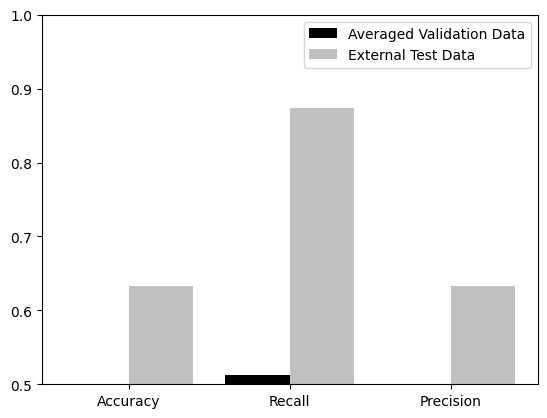


rbf kernel:

[[0.4333333333333334, 0.6332469654528479, 0.4333333333333334], [0.3333333333333333, 0.5277777777777778, 0.3333333333333333]]


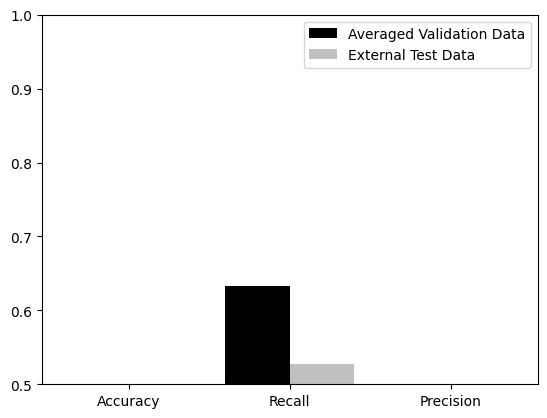

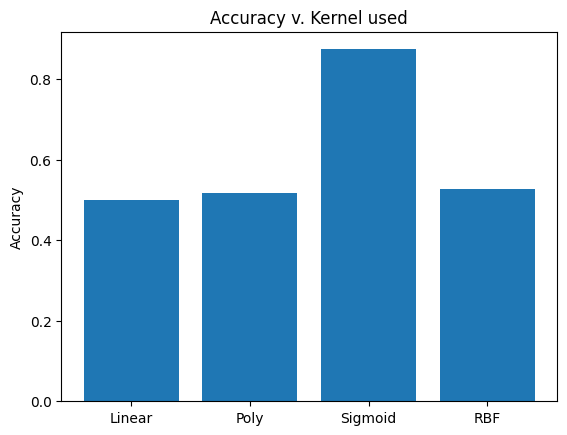

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
v1data = df[df['Visit']==1]
standardizedNeuroMMSEData = pd.DataFrame(scaler.fit_transform(v1data[['MMSE','eTIV','nWBV','ASF']]),columns=['MMSE','eTIV','nWBV','ASF'])
standardizedNeuroMMSEData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroMMSEData = standardizedNeuroMMSEData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroMMSEData))

**Standardized Neuro + MMSE + Age Data**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.7566666666666666, 0.8537543792771578, 0.7566666666666666], [0.7466666666666667, 0.8466666666666667, 0.7466666666666667]]


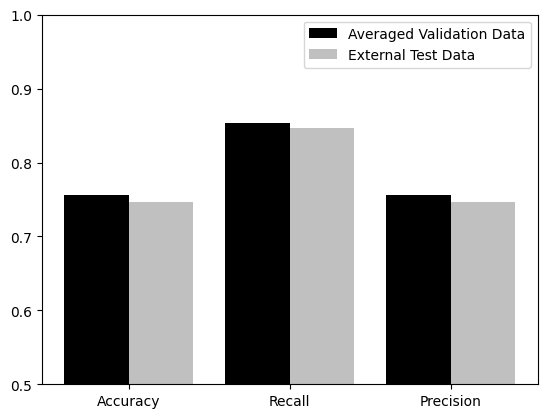


L2-Restricted LogReg Model

[[0.7266666666666668, 0.8395295090932079, 0.7266666666666668], [0.7466666666666667, 0.8533333333333334, 0.7466666666666667]]


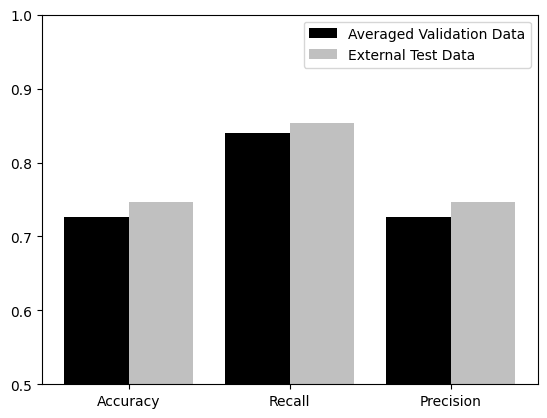


 DECISION TREE 


un-resticted Decision Tree

[[0.6833333333333333, 0.5623556576626753, 0.6833333333333333], [0.6666666666666666, 0.5727691977691977, 0.6666666666666666]]


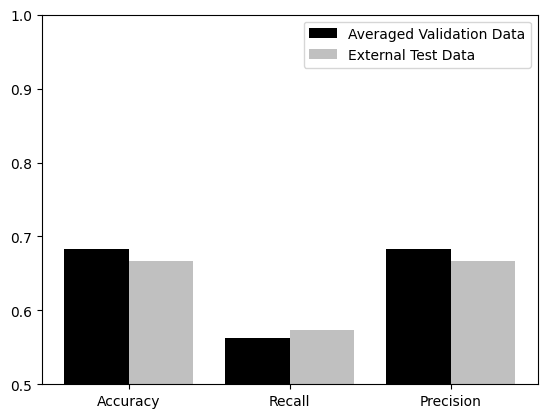


10 layer max Decision Tree

[[0.6433333333333333, 0.5123962100804562, 0.6433333333333333], [0.68, 0.571021021021021, 0.68]]


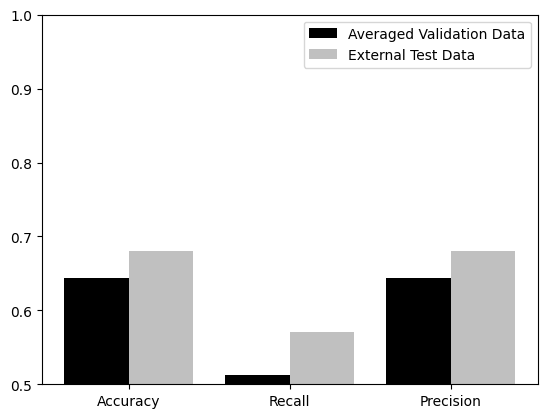


5 layer max Decision Tree

[[0.6866666666666666, 0.7415202399939241, 0.6866666666666666], [0.76, 0.5171530977982591, 0.76]]


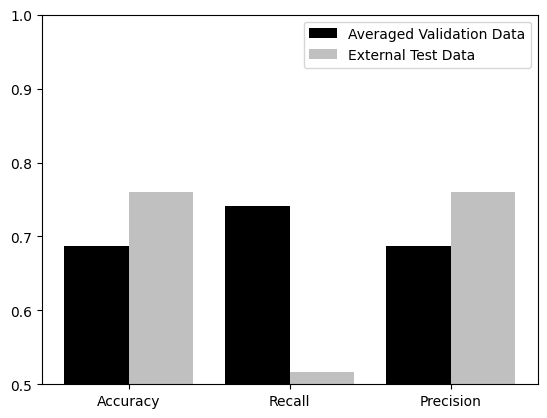

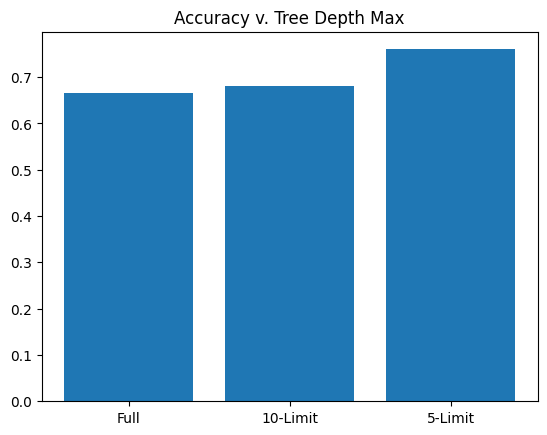


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.7633333333333333, 0.8641114209149888, 0.7633333333333333], [0.8266666666666667, 0.898176291793313, 0.8266666666666667]]


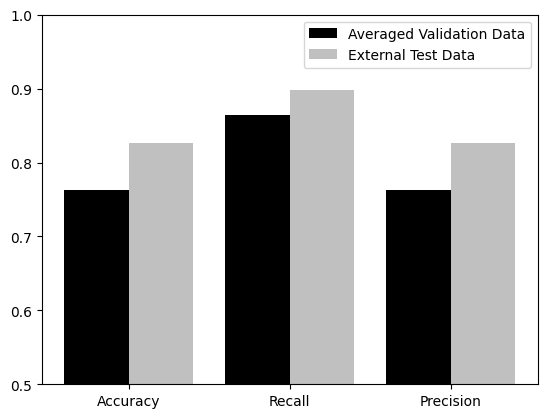


poly kernel:

[[0.6966666666666667, 0.8463787869228601, 0.6966666666666667], [0.72, 0.8391812865497076, 0.72]]


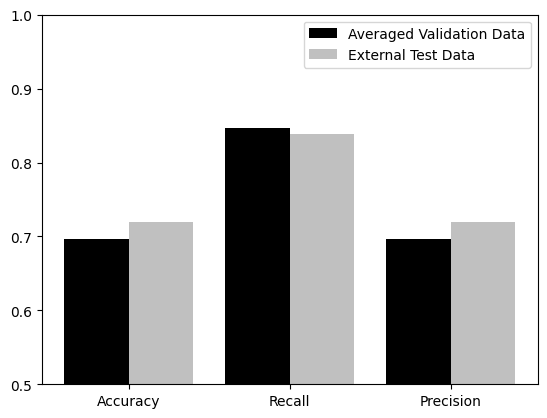


sigmoid kernel:

[[0.6666666666666667, 0.7772231056677021, 0.6666666666666667], [0.6266666666666667, 0.7589631782945737, 0.6266666666666667]]


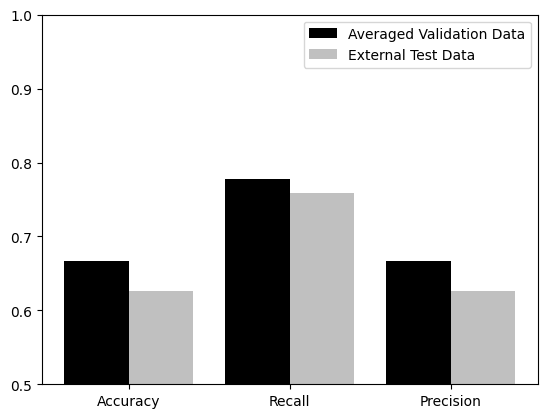


rbf kernel:

[[0.7633333333333333, 0.8718291045978616, 0.7633333333333333], [0.7066666666666667, 0.8133333333333334, 0.7066666666666667]]


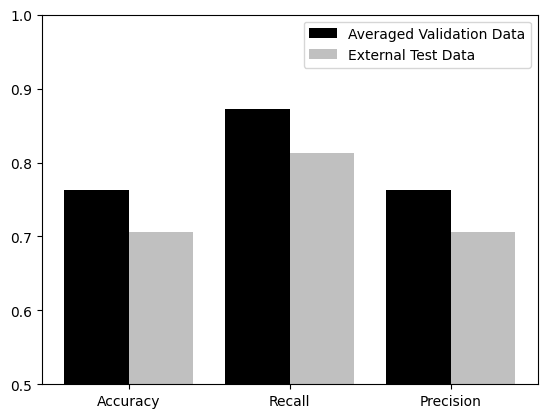

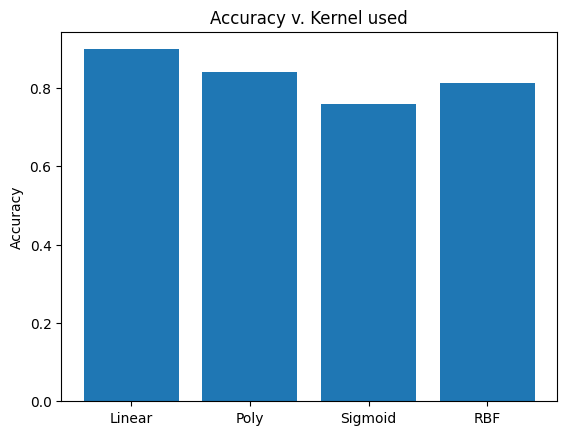

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedNeuroMMSEData = pd.DataFrame(scaler.fit_transform(df[['MMSE','Age','eTIV','nWBV','ASF']]),columns=['MMSE','Age','eTIV','nWBV','ASF'])
standardizedNeuroMMSEData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroMMSEData = standardizedNeuroMMSEData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroMMSEData))

**Visit 1 Standardized Neuro + MMSE + Age Data**

LOGISTIC REGRESSION 


un-resticted LogReg Model

[[0.4333333333333333, 0.5320358868184956, 0.4333333333333333], [0.3333333333333333, 0.5535714285714285, 0.3333333333333333]]


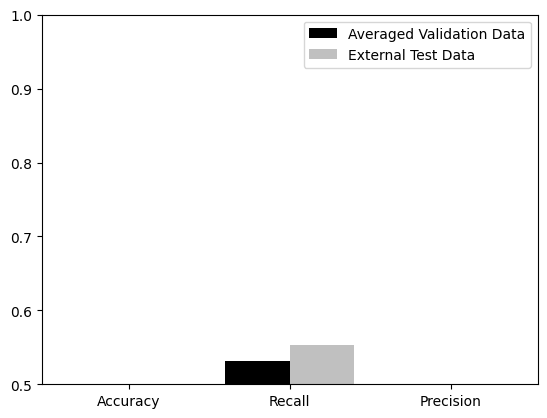


L2-Restricted LogReg Model

[[0.4333333333333333, 0.7178571428571429, 0.4333333333333333], [0.5, 0.8333333333333334, 0.5]]


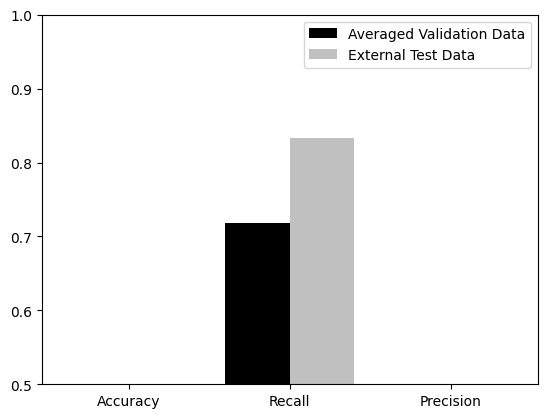


 DECISION TREE 


un-resticted Decision Tree

[[0.3916666666666667, 0.2720914488561547, 0.3916666666666667], [0.4666666666666667, 0.33169934640522875, 0.4666666666666667]]


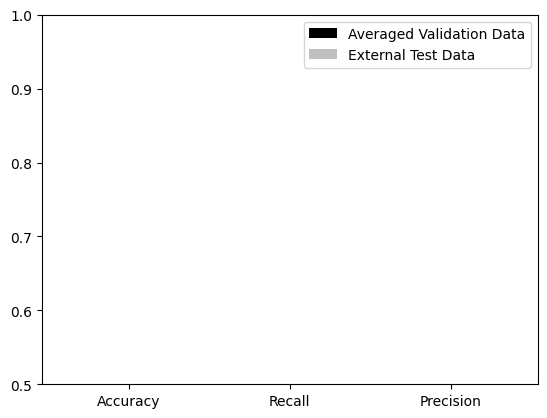


10 layer max Decision Tree

[[0.4583333333333333, 0.41002442002441997, 0.4583333333333333], [0.26666666666666666, 0.28216374269005845, 0.26666666666666666]]


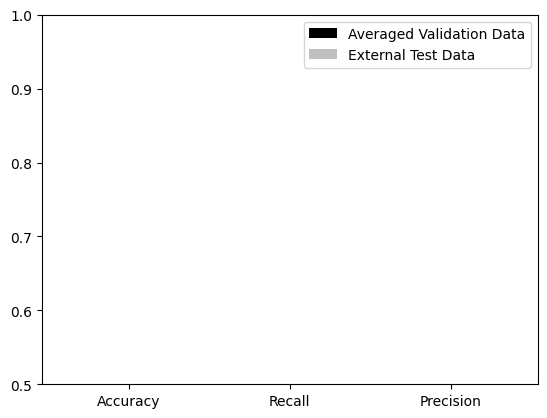


5 layer max Decision Tree

[[0.45, 0.4993079143079143, 0.45], [0.43333333333333335, 0.3194444444444445, 0.43333333333333335]]


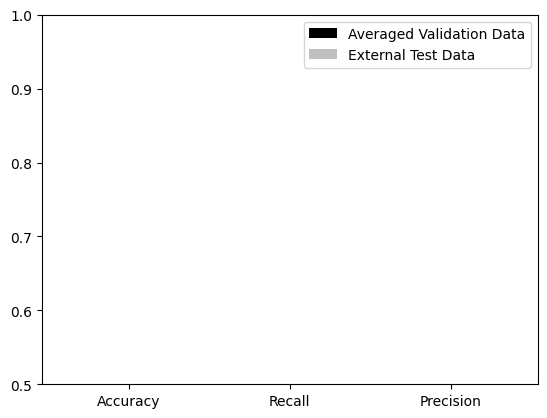

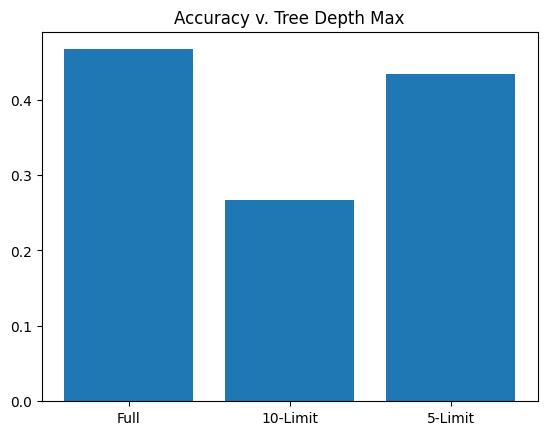


 SUPPORT VECTOR MACHINE 


linear kernel:

[[0.4083333333333333, 0.7558469308469308, 0.4083333333333333], [0.26666666666666666, 0.5, 0.26666666666666666]]


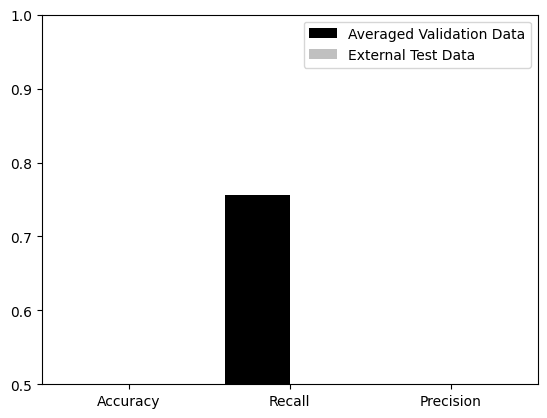


poly kernel:

[[0.5166666666666667, 0.5089126559714795, 0.5166666666666667], [0.3, 0.5192307692307693, 0.3]]


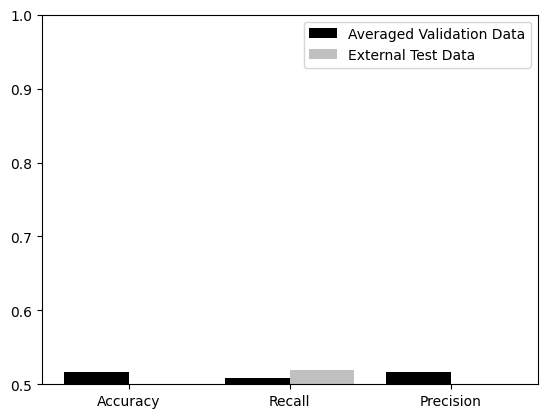


sigmoid kernel:

[[0.4916666666666666, 0.6341269841269842, 0.4916666666666666], [0.36666666666666664, 0.5679012345679012, 0.36666666666666664]]


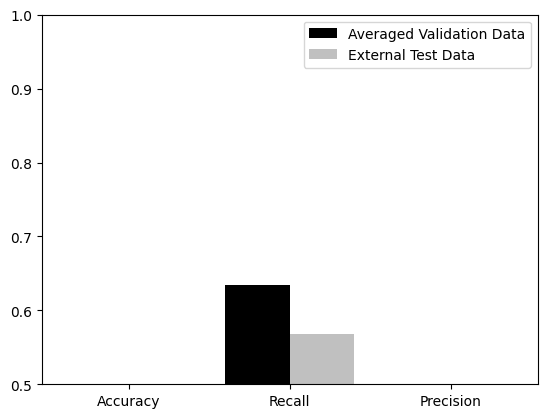


rbf kernel:

[[0.5416666666666667, 0.7302777777777778, 0.5416666666666667], [0.36666666666666664, 0.7888888888888889, 0.36666666666666664]]


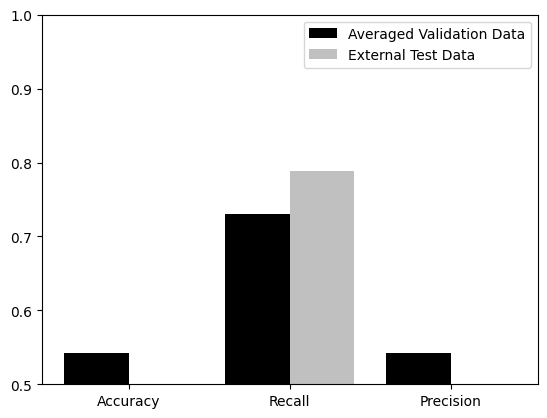

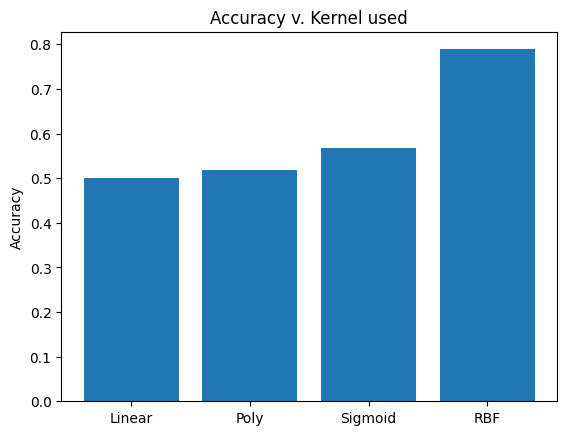

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
v1data = df[df['Visit']==1]
standardizedNeuroMMSEAgeData = pd.DataFrame(scaler.fit_transform(v1data[['MMSE','Age','eTIV','nWBV','ASF']]),columns=['MMSE','Age','eTIV','nWBV','ASF'])
standardizedNeuroMMSEAgeData['Group'] = df['Group']
#enumerating group (Non=0, Demented=1, Converted=2)
standardizedNeuroMMSEAgeData = standardizedNeuroMMSEAgeData.replace(['Nondemented','Demented','Converted'],[0,1,2])
linKernelAcc.append(fullRun(standardizedNeuroMMSEAgeData))

Text(0.5, 1.0, 'External Recalls of each Condition')

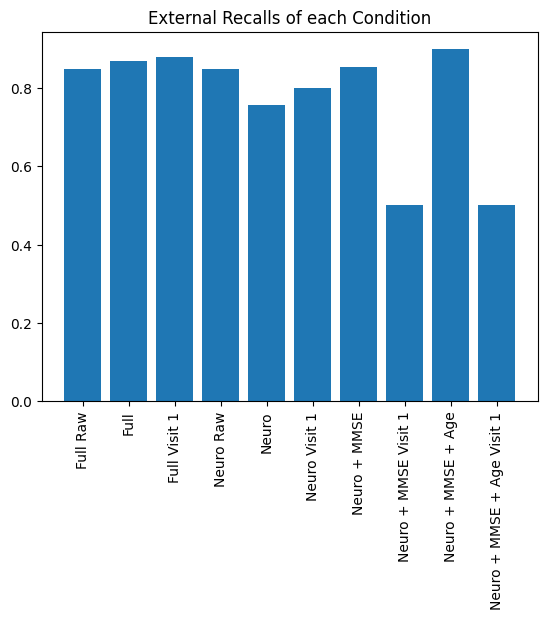

In [81]:
import matplotlib.pyplot as plt
x=[0,1,2,3,4,5,6,7,8,9]
plt.bar(x,linKernelAcc)
plt.xticks(x,['Full Raw','Full','Full Visit 1','Neuro Raw','Neuro','Neuro Visit 1',
       'Neuro + MMSE','Neuro + MMSE Visit 1','Neuro + MMSE + Age', 'Neuro + MMSE + Age Visit 1'])
plt.xticks(rotation=90)
plt.title('External Recalls of each Condition')